# Ensemble Techniques Project

# Problem statement:

Goal is to classify the patients into the respective labels using the attributes from
their voice recordings

Exploratory Data Analysis to predict the Patients who have been affected by Parkinsons Disease 
to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

In [294]:
# Import Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline


# Model Building - LR, KNN, NB,SVC, Decision Tree , Ensemble Models 
##import scikit learn for Model Building
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import svm
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 
#Data Preprocessing to scale the data
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline



# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

# 1. Load the dataset

In [8]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard

In [9]:
#Reshaping the Target column = Status
#Drop and re-locate status at the end column in DataFrame
# Create  copy of Dataframe for Data manipulation
pdata = data
target= pdata['status']
pdata.drop(['status'], axis = 1,inplace = True)
pdata['status'] = target
pdata.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  status  
0  0.284654       1  
1  0.368674       1  
2  0.332634       1  
3  0.368975       1  
4  0.410335       1

In [10]:
#Open and read the File
pd_data = open("Data - Parkinsons", "r")
print(pd_data.read())  

name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
phon_R01_S01_1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,0.02757,0.03858,0.03590,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,0.02924,0.04005,0.03772,0.08771,0.01353,20.64400,1,

In [11]:
#To check the dimension or shape of the dataset
pdata.shape

(195, 24)

This Voice recording dataset contains 195 obervations and 24 attributes

In [12]:
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
pdata.groupby('status').count()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                                  
0         48           48            48            48              48   
1        147          147           147           147             147   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                     48        48        48          48            48   
1                    147       147       147         147           147   

        MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
status                                                                        
0                     48            48            48        48           48   
1                    147           147           147       147          147   

        NHR  HNR  RPDE  DFA  spread1  spread2   D2  PPE  
status                                                   
0        48   48    48   48       48       48   48   48  
1       147  147   147  147      147      147  147  147

Total count of Health status of the person (one) - Parkinson's : 147

Total count of Health status of the person (Zero) - Healthy : 48

In [13]:
# To view the data type and number of values entered in each of the Independent attributes and Dependent attribute
loan_bank.info()
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

All the columns/attributes have 195 non-null values.

In [14]:
# display Number of Null values in each of the attribute
pdata.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

No Null values present in each of the Attribute

In [15]:
# check whether the column has any value other than numeric values
pdata.iloc[:,1:][~pdata.iloc[:,1:].applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, RPDE, DFA, spread1, spread2, D2, PPE, status]
Index: []

All columns are Numeric attributes except Name column

In [16]:
#describe() show the summary of statistics about all numeric attributes.
pdata.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   
status            195.0    0.753846   0.431878    0.000000    1.000000   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367  
status              1.000000    1.000000    1.000000

MDVP:Fo(Hz) - Average vocal fundamental frequency's mean value is 154.228641
    
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency's maximum value is 592.030000
    
MDVP:Flo(Hz) - Minimum vocal fundamental frequency's minimum value is 0.001680
    
PPE attribute(nonlinear measures of fundamental frequency) spreads 75% of the data point in the range of around 0.252980
Status - Maximum rate of the healthy status of the subject which indicates more persons affected by Parkinsons Disease

In [17]:
#Check Correlation of all Attributes
pdata.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   
status              -0.383535     -0.166136     -0.380200        0.278220   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   
status                    0.338653  0.266668  0.288698    0.266646   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
MDVP:Fo(Hz)          -0.098374         -0.073742     -0.094717     -0.070682   
MDVP:Fhi(Hz)          0.002281          0.043465     -0.003743     -0.009997   
MDVP:Flo(Hz)         -0.144543         -0.119089     -0.150747     -0.101095   
MDVP:Jitter(%)        0.769063          0.804289      0.746625      0.725561   
MDVP:Jitter(Abs)      0.703322          0.716601      0.697153      0.648961   
MDVP:RAP

# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations

# Univariate Analysis

In [18]:
pdata.kurtosis(numeric_only  = True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
status              -0.595518
dtype: float64

Kurtosis with positive values indicates that those attributes have more data points around the tail

In [19]:
pdata.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
status             -1.187727
dtype: float64

Skewness with positive values indicates data is skewed towards right. Skewness with negative values indicates data is skewed towards left

# Average vocal fundamental frequency MDVP:Fo(Hz)

In [20]:
print("The average vocal fundamental frequency of person is {:.2f} and \n 90% of the people have a Fo of around {:.2f}".format(pdata['MDVP:Fo(Hz)'].mean(),pdata['MDVP:Fo(Hz)'].quantile(0.90)))

The average vocal fundamental frequency of person is 154.23 and 
 90% of the people have a Fo of around 209.89


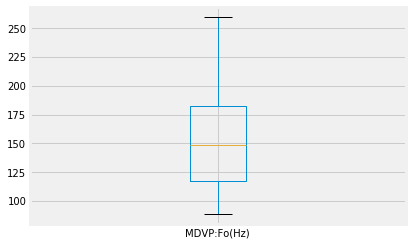

In [21]:
pdata['MDVP:Fo(Hz)'].plot(kind='box');

No outliers present for MDVP:Fo(Hz)

Skewness : 0.5917374636540784
Kurtosis : -0.6278981066788805


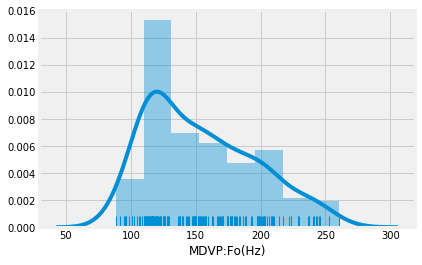

In [22]:
print('Skewness :',pdata['MDVP:Fo(Hz)'].skew())
print('Kurtosis :',pdata['MDVP:Fo(Hz)'].kurtosis())
sns.distplot(pdata['MDVP:Fo(Hz)'],kde = True,rug = True);

The skweness value is positive hence the data is skewed towards right side

The kurtosis value is negative hence less data points are around the tail

# Maximum vocal fundamental frequency MDVP:Fhi (Hz)

In [23]:
print("The maximum vocal fundamental frequency of a person is {:.2f} and \n 90% of the people have a Fhi of {:.2f}".format(pdata['MDVP:Fhi(Hz)'].mean(),pdata['MDVP:Fhi(Hz)'].quantile(0.90)))

The maximum vocal fundamental frequency of a person is 197.10 and 
 90% of the people have a Fhi of 261.00


0    157.302
1    148.650
2    131.111
3    137.871
4    141.781
5    131.162
6    137.244
7    113.840
8    132.068
9    120.103
Name: MDVP:Fhi(Hz), dtype: float64


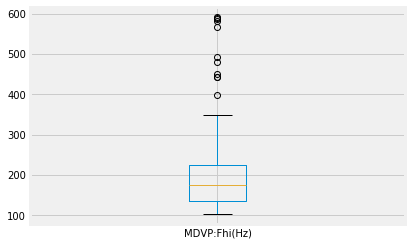

In [24]:
print(pdata['MDVP:Fhi(Hz)'].head(10))
pdata['MDVP:Fhi(Hz)'].plot(kind='box');


More number of outliers present for MDVP:Fhi(Hz)

Skewness : 2.542145997588398
Kurtosis : 7.627241211631889


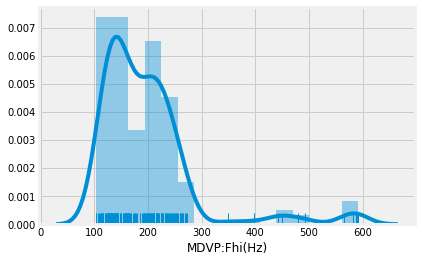

In [25]:
print('Skewness :',pdata['MDVP:Fhi(Hz)'].skew())
print('Kurtosis :',pdata['MDVP:Fhi(Hz)'].kurtosis())
sns.distplot(pdata['MDVP:Fhi(Hz)'],kde = True,rug = True);

The Skewness value is positive hence the data is skewed towards right side

The Kurtosis value is postive hence more data points are around the tail

In [26]:
#Outlier Treatment
q3 = pdata['MDVP:Fhi(Hz)'].quantile(0.75)
q1 = pdata['MDVP:Fhi(Hz)'].quantile(0.25)
iqr = q3-q1
out_above = q3+iqr
out_below = q1-iqr
print("outliers_above : {}".format(out_above))
print("outliers_below : {}".format(out_below))

outliers_above : 313.5485
outliers_below : 45.51950000000002


In [27]:
print("Total observations above outlier :",pdata['MDVP:Fhi(Hz)'].loc[pdata['MDVP:Fhi(Hz)']>out_above].count())
print("Total observations below outlier : ",pdata['MDVP:Fhi(Hz)'].loc[pdata['MDVP:Fhi(Hz)']<out_below].count())
print("Data points above outlier :\n",pdata['MDVP:Fhi(Hz)'].loc[pdata['MDVP:Fhi(Hz)']>out_above])

Total observations above outlier : 12
Total observations below outlier :  0
Data points above outlier :
 16     349.259
73     588.518
102    586.567
115    492.892
116    442.557
117    450.247
118    442.824
120    479.697
149    565.740
186    592.030
187    581.289
193    396.961
Name: MDVP:Fhi(Hz), dtype: float64


In [28]:
mean_val = pdata['MDVP:Fhi(Hz)'].loc[pdata['MDVP:Fhi(Hz)']<=out_above].mean()
pdata['MDVP:Fhi(Hz)'] = pdata['MDVP:Fhi(Hz)'].mask(pdata['MDVP:Fhi(Hz)']>out_above,mean_val)
print("After Outlier Treatment")
print(pdata['MDVP:Fhi(Hz)'].head(10))

After Outlier Treatment
0    157.302
1    148.650
2    131.111
3    137.871
4    141.781
5    131.162
6    137.244
7    113.840
8    132.068
9    120.103
Name: MDVP:Fhi(Hz), dtype: float64


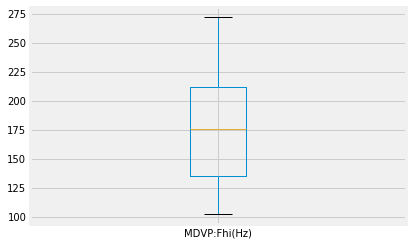

In [29]:
pdata['MDVP:Fhi(Hz)'].plot(kind='box');

Skewness : 0.2984561761401523
Kurtosis : -1.0462818430124097


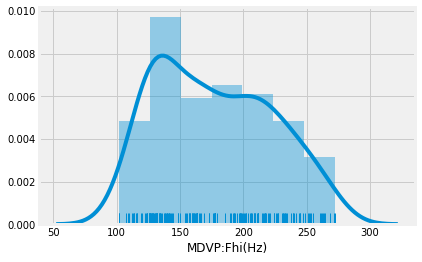

In [30]:
print('Skewness :',pdata['MDVP:Fhi(Hz)'].skew())
print('Kurtosis :',pdata['MDVP:Fhi(Hz)'].kurtosis())
sns.distplot(pdata['MDVP:Fhi(Hz)'],kde = True,rug = True);

After outlier treatment kurtosis indicates that less number of data points are around the tail

# Minimum vocal fundamental frequency MDVP:Flo (Hz)

In [31]:
print("The minimum vocal fundamental frequency of a person is {:.2f} and \n 90% of the people have a Flo of {:.2f}".format(pdata['MDVP:Flo(Hz)'].mean(),pdata['MDVP:Flo(Hz)'].quantile(0.90)))

The minimum vocal fundamental frequency of a person is 116.32 and 
 90% of the people have a Flo of 187.88


0     74.997
1    113.819
2    111.555
3    111.366
4    110.655
5    113.787
6    114.820
7    104.315
8     91.754
9     91.226
Name: MDVP:Flo(Hz), dtype: float64


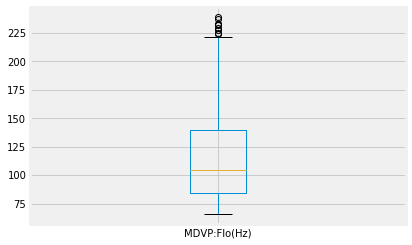

In [32]:
print(pdata['MDVP:Flo(Hz)'].head(10))
pdata['MDVP:Flo(Hz)'].plot(kind='box');

More number of Ouliers present for MDVP:Flo(Hz)

Skewness :  1.217350448627808
Kurtosis :  0.6546145211395396


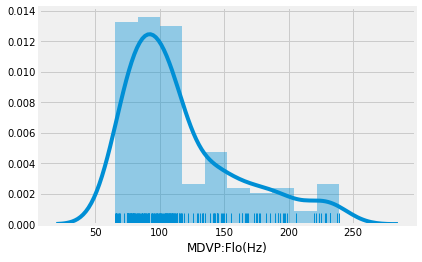

In [33]:
print('Skewness : ',pdata['MDVP:Flo(Hz)'].skew())
print('Kurtosis : ',pdata['MDVP:Flo(Hz)'].kurtosis())
sns.distplot(pdata['MDVP:Flo(Hz)'],kde = True,rug = True);

The skewnessvalue is positive hence the data is skewed towards right side

The kurtosis value is postive hence the more data points are around the tail

In [34]:
#Outlier Treatment
q3 = pdata['MDVP:Flo(Hz)'].quantile(0.75)
q1 = pdata['MDVP:Flo(Hz)'].quantile(0.25)
iqr = q3-q1
out_above = q3+iqr
out_below = q1-iqr
print("outliers_above : {}".format(out_above))
print("outliers_below : {}".format(out_below))

outliers_above : 195.74600000000004
outliers_below : 28.563499999999976


In [35]:
print("Total observations above outlier :",pdata['MDVP:Flo(Hz)'].loc[pdata['MDVP:Flo(Hz)']>out_above].count())
print("Total observations below outlier : ",pdata['MDVP:Flo(Hz)'].loc[pdata['MDVP:Flo(Hz)']<out_below].count())
print("Data points above outlier :\n",pdata['MDVP:Flo(Hz)'].loc[pdata['MDVP:Flo(Hz)']>out_above])

Total observations above outlier : 15
Total observations below outlier :  0
Data points above outlier :
 33     197.079
34     196.160
42     225.227
43     232.483
44     232.435
45     227.911
46     231.848
62     205.495
63     223.634
64     221.156
111    199.020
166    229.256
167    237.303
169    219.783
170    239.170
Name: MDVP:Flo(Hz), dtype: float64


After Outlier treatment
0     74.997
1    113.819
2    111.555
3    111.366
4    110.655
5    113.787
6    114.820
7    104.315
8     91.754
9     91.226
Name: MDVP:Flo(Hz), dtype: float64
AxesSubplot(0.08,0.125;0.87x0.755)


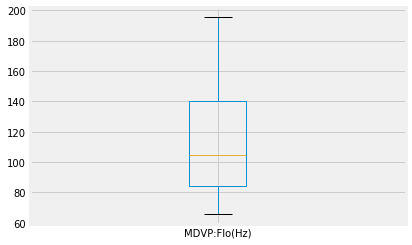

In [36]:
max_val = pdata['MDVP:Flo(Hz)'].loc[pdata['MDVP:Flo(Hz)']<=out_above].max()
pdata['MDVP:Flo(Hz)'] = pdata['MDVP:Flo(Hz)'].mask(pdata['MDVP:Flo(Hz)']>out_above,max_val)
print("After Outlier treatment")
print(pdata['MDVP:Flo(Hz)'].head(10))
print(pdata['MDVP:Flo(Hz)'].plot(kind='box'));

Skewness :  0.9105008789129816
Kurtosis :  -0.3380621656813876


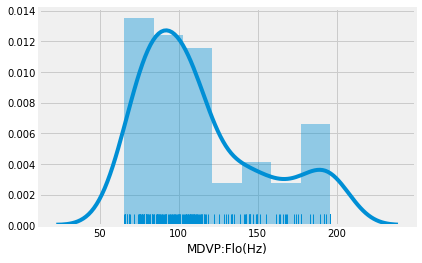

In [37]:
print('Skewness : ',pdata['MDVP:Flo(Hz)'].skew())
print('Kurtosis : ',pdata['MDVP:Flo(Hz)'].kurtosis())
sns.distplot(pdata['MDVP:Flo(Hz)'], kde= True, rug = True);

After outlier treatment kurtosis indicates less number of data points around the tail

# Five measures of variation in fundamental frequency
MDVP:Jitter(%)

0    0.00784
1    0.00968
2    0.01050
3    0.00997
4    0.01284
5    0.00968
6    0.00333
7    0.00290
8    0.00551
9    0.00532
Name: MDVP:Jitter(%), dtype: float64


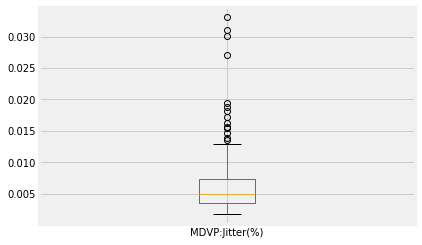

In [38]:
print(pdata['MDVP:Jitter(%)'].head(10))
pdata['MDVP:Jitter(%)'].plot(kind='box');

More number of outliers present for MDVP:Jitter(%)

In [39]:
print("The minimum vocal fundamental frequency of a person is {:.2f} and \n 90% of the people have a Jitter of {:.2f}".format(pdata['MDVP:Jitter(%)'].mean(),pdata['MDVP:Jitter(%)'].quantile(0.90)))

The minimum vocal fundamental frequency of a person is 0.01 and 
 90% of the people have a Jitter of 0.01


Skewness : 3.0849462014441817
Kurtosis : 12.030939276179508


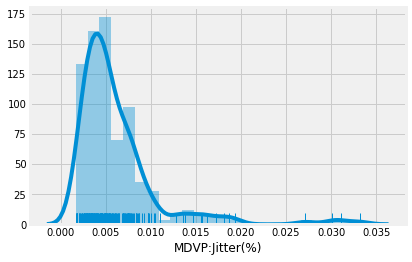

In [40]:
print('Skewness :',pdata['MDVP:Jitter(%)'].skew())
print('Kurtosis :',pdata['MDVP:Jitter(%)'].kurtosis())
sns.distplot(pdata['MDVP:Jitter(%)'],kde= True , rug= True);

The skweness value is positive hence the data is skewed towards right side

The Kurtosis value is positive hence more data points around the tail

In [41]:
#Outlier Treatment
q3 = pdata['MDVP:Jitter(%)'].quantile(0.75)
q1 = pdata['MDVP:Jitter(%)'].quantile(0.25)
iqr = q3-q1
out_above = q3+iqr
out_below = q1-iqr
print("outliers_above : {}".format(out_above))
print("outliers_below : {}".format(out_below))

outliers_above : 0.01127
outliers_below : -0.0004450000000000001


In [42]:
print("Total observations above outlier",pdata['MDVP:Jitter(%)'].loc[pdata['MDVP:Jitter(%)']>out_above].count())
print("Total observations below outlier",pdata['MDVP:Jitter(%)'].loc[pdata['MDVP:Jitter(%)']<out_below].count())
print("Data points above Outlier limit")
print(pdata['MDVP:Jitter(%)'].loc[pdata['MDVP:Jitter(%)']>out_above])

Total observations above outlier 16
Total observations below outlier 0
Data points above Outlier limit
4      0.01284
97     0.01280
98     0.01378
99     0.01936
100    0.03316
101    0.01551
102    0.03011
146    0.01568
147    0.01466
148    0.01719
149    0.01627
150    0.01872
151    0.03107
152    0.02714
157    0.01813
192    0.01360
Name: MDVP:Jitter(%), dtype: float64


After outlier Treatment
0    0.00784
1    0.00968
2    0.01050
3    0.00997
4    0.01101
5    0.00968
6    0.00333
7    0.00290
8    0.00551
9    0.00532
Name: MDVP:Jitter(%), dtype: float64
AxesSubplot(0.08,0.125;0.87x0.755)


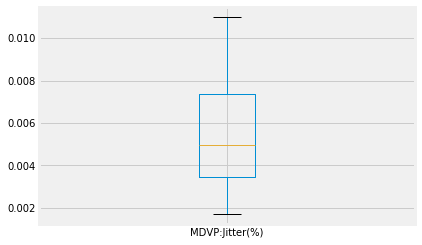

In [43]:
max_val = pdata['MDVP:Jitter(%)'].loc[pdata['MDVP:Jitter(%)']<=out_above].max()
pdata['MDVP:Jitter(%)'] = pdata['MDVP:Jitter(%)'].mask(pdata['MDVP:Jitter(%)']>out_above,max_val)
print("After outlier Treatment")
print(pdata['MDVP:Jitter(%)'].head(10))
print(pdata['MDVP:Jitter(%)'].plot(kind='box'));

Skewness :  0.7135316854634219
Kurtosis :  -0.45799448113050856


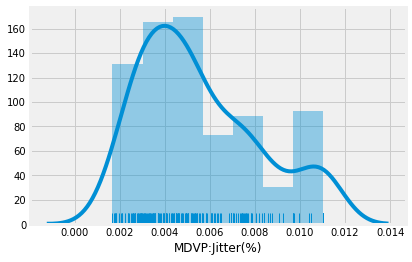

In [44]:
print('Skewness : ',pdata['MDVP:Jitter(%)'].skew())
print('Kurtosis : ',pdata['MDVP:Jitter(%)'].kurtosis())
sns.distplot(pdata['MDVP:Jitter(%)'],kde= True , rug = True);

After outlier treatment kurtosis indicates less number of data points around the tail

# MDVP:Jitter(Abs)

0    0.00007
1    0.00008
2    0.00009
3    0.00009
4    0.00011
5    0.00008
6    0.00003
7    0.00003
8    0.00006
9    0.00006
Name: MDVP:Jitter(Abs), dtype: float64


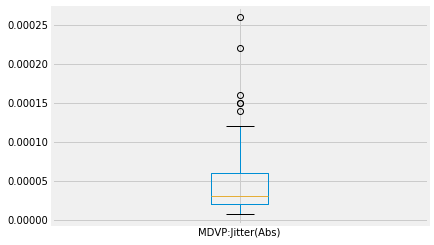

In [45]:
print(pdata['MDVP:Jitter(Abs)'].head(10))
pdata['MDVP:Jitter(Abs)'].plot(kind='box');

Skewness :  2.6490714165257274
kurtosis :  10.869042517763667


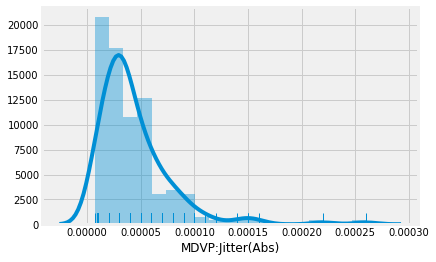

In [46]:
print('Skewness : ',pdata['MDVP:Jitter(Abs)'].skew())
print('kurtosis : ',pdata['MDVP:Jitter(Abs)'].kurtosis())
sns.distplot(pdata['MDVP:Jitter(Abs)'],kde = True, rug =True);

In [47]:
#Outlier Treatment
q3 = pdata['MDVP:Jitter(Abs)'].quantile(0.75)
q1 = pdata['MDVP:Jitter(Abs)'].quantile(0.25)
iqr = q3-q1
out_above = q3+iqr
out_below = q1-iqr
print("outliers_above : {}".format(out_above))
print("outliers_below : {}".format(out_below))

outliers_above : 9.999999999999999e-05
outliers_below : -1.9999999999999995e-05


In [48]:
print("Total observations above outlier",pdata['MDVP:Jitter(Abs)'].loc[pdata['MDVP:Jitter(Abs)']>out_above].count())
print("Total observations below outlier",pdata['MDVP:Jitter(Abs)'].loc[pdata['MDVP:Jitter(Abs)']<out_below].count())
print("Data points above Outlier limit")
print(pdata['MDVP:Jitter(Abs)'].loc[pdata['MDVP:Jitter(Abs)']>out_above])

Total observations above outlier 12
Total observations below outlier 0
Data points above Outlier limit
4      0.00011
79     0.00010
97     0.00010
98     0.00011
99     0.00015
100    0.00026
101    0.00012
102    0.00022
150    0.00010
151    0.00016
152    0.00014
157    0.00015
Name: MDVP:Jitter(Abs), dtype: float64


After Outlier Treatment
0    0.000070
1    0.000080
2    0.000090
3    0.000090
4    0.000037
5    0.000080
6    0.000030
7    0.000030
8    0.000060
9    0.000060
Name: MDVP:Jitter(Abs), dtype: float64
AxesSubplot(0.08,0.125;0.87x0.755)


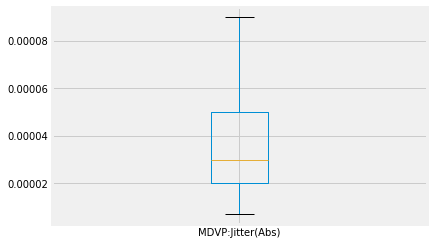

In [49]:
mean_val = pdata['MDVP:Jitter(Abs)'].loc[pdata['MDVP:Jitter(Abs)']<=out_above].mean()
pdata['MDVP:Jitter(Abs)'] = pdata['MDVP:Jitter(Abs)'].mask(pdata['MDVP:Jitter(Abs)']>out_above,mean_val)
print("After Outlier Treatment")
print(pdata['MDVP:Jitter(Abs)'].head(10))
print(pdata['MDVP:Jitter(Abs)'].plot(kind='box'));

skewness :  0.7300925097869511
Kurtosis :  0.008361144000160525


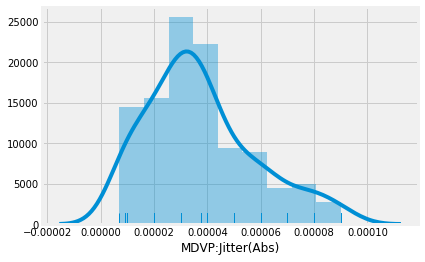

In [50]:
print('skewness : ',pdata['MDVP:Jitter(Abs)'].skew())
print('Kurtosis : ',pdata['MDVP:Jitter(Abs)'].kurtosis())
sns.distplot(pdata['MDVP:Jitter(Abs)'],kde = True ,rug= True);

After outlier treatment kurtosis indicates less number of data points around the tail

# MDVP:RAP

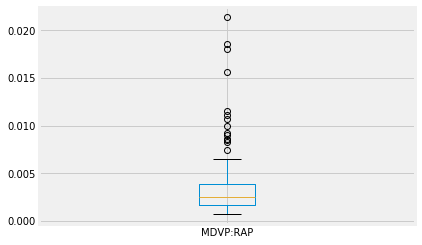

In [51]:
pdata['MDVP:RAP'].plot(kind='box');

Skewness :  3.360708450480554
Kurtosis :  14.213797721522418


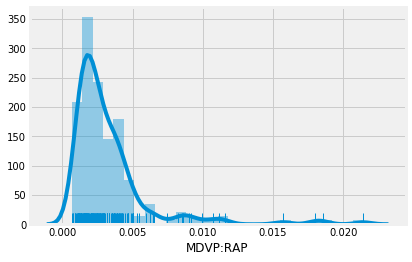

In [52]:
print('Skewness : ',pdata['MDVP:RAP'].skew())
print('Kurtosis : ',pdata['MDVP:RAP'].kurtosis())
sns.distplot(pdata['MDVP:RAP'],kde=True , rug =True);

The skewness value is positive hence the data is skewed towards right side

The kurtosis value is positive hence more data points are around the tail

In [53]:
#Outlier Treatment
q3 = pdata['MDVP:RAP'].quantile(0.75)
q1 = pdata['MDVP:RAP'].quantile(0.25)
iqr = q3-q1
out_above = q3+iqr
out_below = q1-iqr
print("outliers_above : {}".format(out_above))
print("outliers_below : {}".format(out_below))

outliers_above : 0.00601
outliers_below : -0.0005149999999999996


In [54]:
print("Total observations above outlier",pdata['MDVP:RAP'].loc[pdata['MDVP:RAP']>out_above].count())
print("Total observations below outlier",pdata['MDVP:RAP'].loc[pdata['MDVP:RAP']<out_below].count())
print("Data points above Outlier limit")
print(pdata['MDVP:RAP'].loc[pdata['MDVP:RAP']>out_above])

Total observations above outlier 18
Total observations below outlier 0
Data points above Outlier limit
4      0.00655
68     0.00647
79     0.00622
97     0.00743
98     0.00826
99     0.01159
100    0.02144
101    0.00905
102    0.01854
146    0.00863
147    0.00849
148    0.00996
149    0.00919
150    0.01075
151    0.01800
152    0.01568
157    0.01117
192    0.00624
Name: MDVP:RAP, dtype: float64


After Outlier Treatment
0    0.00370
1    0.00465
2    0.00544
3    0.00502
4    0.00593
5    0.00463
6    0.00155
7    0.00144
8    0.00293
9    0.00268
Name: MDVP:RAP, dtype: float64
AxesSubplot(0.08,0.125;0.87x0.755)


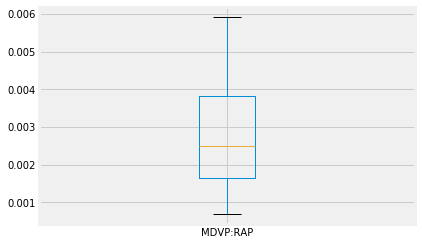

In [55]:
max_val = pdata['MDVP:RAP'].loc[pdata['MDVP:RAP']<=out_above].max()
pdata['MDVP:RAP'] = pdata['MDVP:RAP'].mask(pdata['MDVP:RAP']>out_above,max_val)
print("After Outlier Treatment")
print(pdata['MDVP:RAP'].head(10))
print(pdata['MDVP:RAP'].plot(kind='box'));

Skewness :  0.7370769342317647
Kurtosis :  -0.5062984793572727


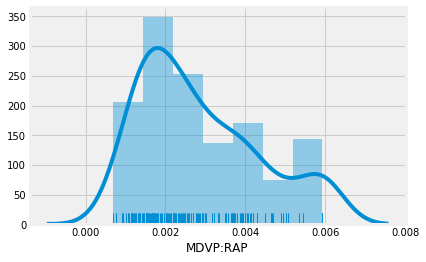

In [56]:
print('Skewness : ',pdata['MDVP:RAP'].skew())
print('Kurtosis : ',pdata['MDVP:RAP'].kurtosis())
sns.distplot(pdata['MDVP:RAP'],kde=True , rug =True);

After outlier treatment kurtosis indicates less number of data points around the tail

# MDVP:PPQ

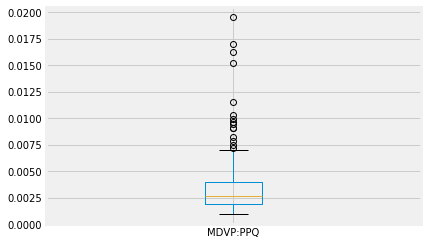

In [57]:
pdata['MDVP:PPQ'].plot(kind='box');

More number of Outliers present

Skewness :  3.073892457888517
Kurtosis :  11.963922120220282


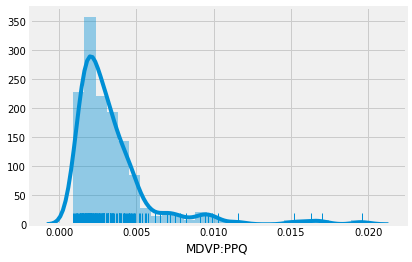

In [58]:
print('Skewness : ',pdata['MDVP:PPQ'].skew())
print('Kurtosis : ',pdata['MDVP:PPQ'].kurtosis())
sns.distplot(pdata['MDVP:PPQ'],kde=True , rug =True);

The skewnessvalue is positive hence the data is skewed towards right side

The kurtosis value is positive hence more data points are around the tail

In [59]:
#Outlier Treatment
q3 = pdata['MDVP:PPQ'].quantile(0.75)
q1 = pdata['MDVP:PPQ'].quantile(0.25)
iqr = q3-q1
out_above = q3+iqr
out_below = q1-iqr
print("outliers_above : {}".format(out_above))
print("outliers_below : {}".format(out_below))

outliers_above : 0.00605
outliers_below : -0.00023499999999999997


In [60]:
print("Total observations above outlier",pdata['MDVP:PPQ'].loc[pdata['MDVP:PPQ']>out_above].count())
print("Total observations below outlier",pdata['MDVP:PPQ'].loc[pdata['MDVP:PPQ']<out_below].count())
print("Data points above Outlier limit")
print(pdata['MDVP:PPQ'].loc[pdata['MDVP:PPQ']>out_above])

Total observations above outlier 19
Total observations below outlier 0
Data points above Outlier limit
1      0.00696
2      0.00781
3      0.00698
4      0.00908
5      0.00750
97     0.00623
98     0.00655
99     0.00990
100    0.01522
101    0.00909
102    0.01628
146    0.00946
147    0.00819
148    0.01027
149    0.00963
150    0.01154
151    0.01958
152    0.01699
157    0.00718
Name: MDVP:PPQ, dtype: float64


After Outlier Treatment
0    0.00554
1    0.00576
2    0.00576
3    0.00576
4    0.00576
5    0.00576
6    0.00202
7    0.00182
8    0.00332
9    0.00332
Name: MDVP:PPQ, dtype: float64
AxesSubplot(0.08,0.125;0.87x0.755)


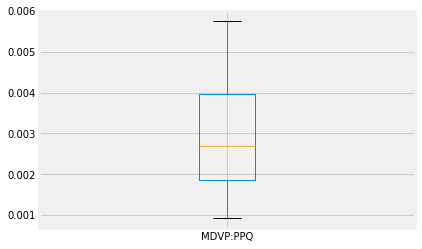

In [61]:
max_val = pdata['MDVP:PPQ'].loc[pdata['MDVP:PPQ']<=out_above].max()
pdata['MDVP:PPQ'] = pdata['MDVP:PPQ'].mask(pdata['MDVP:PPQ']>out_above,max_val)
print("After Outlier Treatment")
print(pdata['MDVP:PPQ'].head(10))
print(pdata['MDVP:PPQ'].plot(kind='box'));

Skewness :  0.6406137677940903
Kurtosis :  -0.6941626966478127


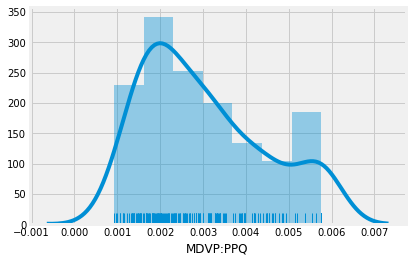

In [62]:
print('Skewness : ',pdata['MDVP:PPQ'].skew())
print('Kurtosis : ',pdata['MDVP:PPQ'].kurtosis())
sns.distplot(pdata['MDVP:PPQ'],kde=True , rug =True);

After outlier treatment kurtosis indicates less number of data points around the tail

# Jitter:DDP

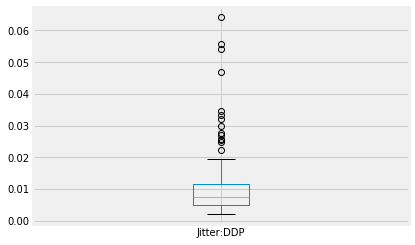

In [63]:
pdata['Jitter:DDP'].plot(kind='box');

Skewness :  3.3620584478857203
Kurtosis :  14.224761911379424


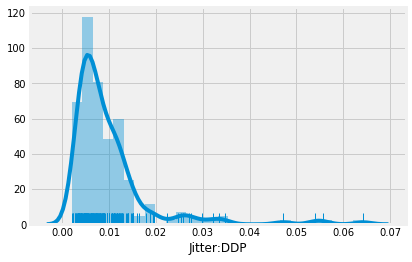

In [64]:
print('Skewness : ',pdata['Jitter:DDP'].skew())
print('Kurtosis : ',pdata['Jitter:DDP'].kurtosis())
sns.distplot(pdata['Jitter:DDP'],kde=True , rug =True);

The skewness value is positive hence the data is skewed towards right side

The kurtosis value is postive hence more data points are around the tail

In [65]:
#Outlier Treatment
q3 = pdata['Jitter:DDP'].quantile(0.75)
q1 = pdata['Jitter:DDP'].quantile(0.25)
iqr = q3-q1
out_above = q3+iqr
out_below = q1-iqr
print("outliers_above : {}".format(out_above))
print("outliers_below : {}".format(out_below))

outliers_above : 0.018025
outliers_below : -0.001535


In [66]:
print("Total observations above outlier",pdata['Jitter:DDP'].loc[pdata['Jitter:DDP']>out_above].count())
print("Total observations below outlier",pdata['Jitter:DDP'].loc[pdata['Jitter:DDP']<out_below].count())
print("Data points above Outlier limit")
print(pdata['Jitter:DDP'].loc[pdata['Jitter:DDP']>out_above])

Total observations above outlier 18
Total observations below outlier 0
Data points above Outlier limit
4      0.01966
68     0.01941
79     0.01865
97     0.02228
98     0.02478
99     0.03476
100    0.06433
101    0.02716
102    0.05563
146    0.02589
147    0.02546
148    0.02987
149    0.02756
150    0.03225
151    0.05401
152    0.04705
157    0.03351
192    0.01873
Name: Jitter:DDP, dtype: float64


After Outlier Treatment
0    0.01109
1    0.01394
2    0.01633
3    0.01505
4    0.01778
5    0.01388
6    0.00466
7    0.00431
8    0.00880
9    0.00803
Name: Jitter:DDP, dtype: float64
AxesSubplot(0.08,0.125;0.87x0.755)


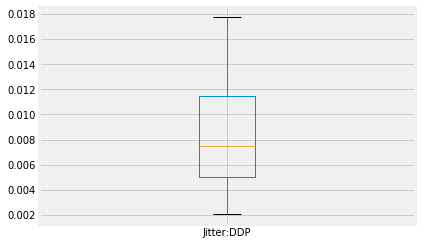

In [67]:
max_val = pdata['Jitter:DDP'].loc[pdata['Jitter:DDP']<=out_above].max()
pdata['Jitter:DDP'] = pdata['Jitter:DDP'].mask(pdata['Jitter:DDP']>out_above,max_val)
print("After Outlier Treatment")
print(pdata['Jitter:DDP'].head(10))
print(pdata['Jitter:DDP'].plot(kind='box'));

Skewness :  0.7360596525004133
Kurtosis :  -0.5082945859294927


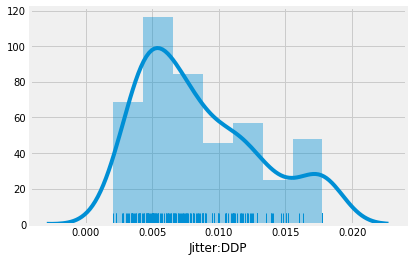

In [68]:
print('Skewness : ',pdata['Jitter:DDP'].skew())
print('Kurtosis : ',pdata['Jitter:DDP'].kurtosis())
sns.distplot(pdata['Jitter:DDP'],kde=True , rug =True);

After outlier treatment kurtosis indicates less number of data points around the tail

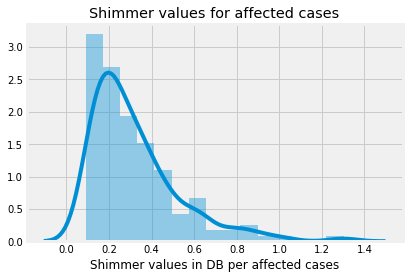

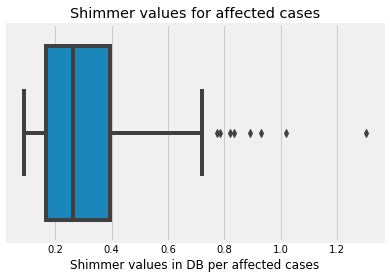

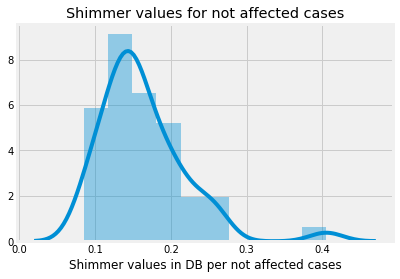

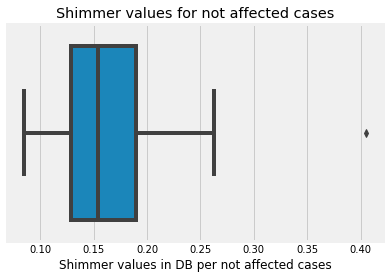

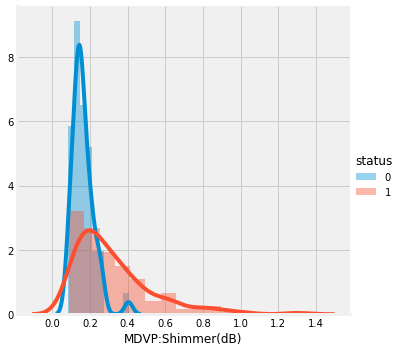

In [69]:
#Analysis of Shimmer
affected_MDVP = pdata[pdata['status']==1]['MDVP:Shimmer(dB)'].values
not_affected_MDVP = pdata[pdata['status']==0]['MDVP:Shimmer(dB)'].values
sns.distplot(affected_MDVP);
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()
sns.boxplot(affected_MDVP);
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()
sns.distplot(not_affected_MDVP);
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per not affected cases')
plt.show()
sns.boxplot(not_affected_MDVP);
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per not affected cases')
plt.show()
sns.FacetGrid(pdata, hue="status", size=5).map(sns.distplot, "MDVP:Shimmer(dB)").add_legend();
plt.show()

# Three nonlinear measures of fundamental frequency variation

# Spread1

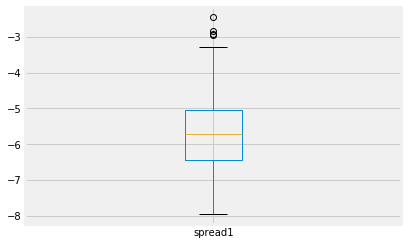

In [70]:
pdata['spread1'].plot(kind='box');

Skewness :  0.4321389320131796
Kurtosis :  -0.05019918161280801


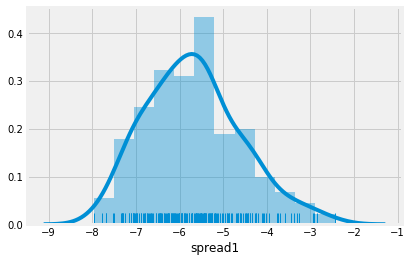

In [71]:
print('Skewness : ',pdata['spread1'].skew())
print('Kurtosis : ',pdata['spread1'].kurtosis())
sns.distplot(pdata['spread1'],kde=True , rug =True);

# Spread2

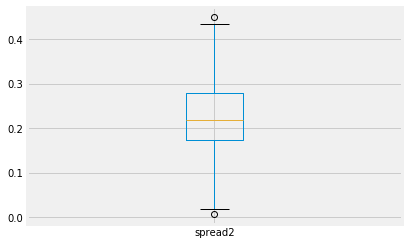

In [72]:
pdata['spread2'].plot(kind='box');

Skewness :  0.14443048549278412
Kurtosis :  -0.08302289327680024


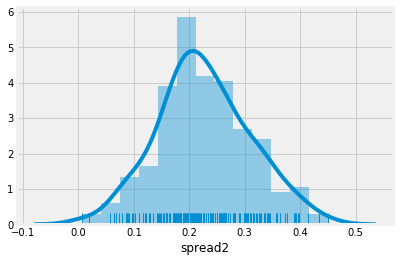

In [73]:
print('Skewness : ',pdata['spread2'].skew())
print('Kurtosis : ',pdata['spread2'].kurtosis())
sns.distplot(pdata['spread2'],kde=True , rug =True);

# PPE

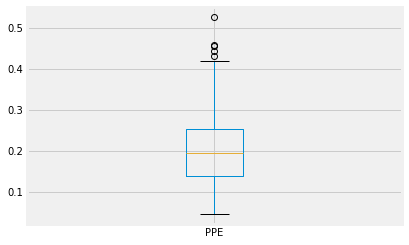

In [74]:
pdata['PPE'].plot(kind='box');

Skewness :  0.7974910716463578
Kurtosis :  0.5283349472852588


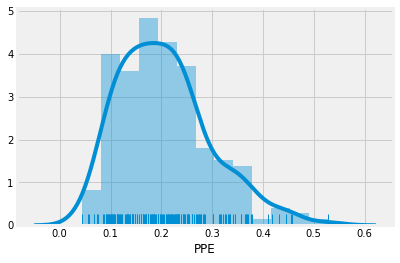

In [75]:
print('Skewness : ',pdata['PPE'].skew())
print('Kurtosis : ',pdata['PPE'].kurtosis())
sns.distplot(pdata['PPE'],kde=True , rug =True);

# Target Column - Status

In [76]:
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
pd.crosstab(pdata['status'],columns='count')

col_0   count
status       
0          48
1         147

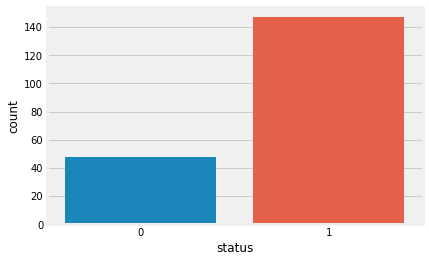

In [77]:
#Target Column Distribution
sns.countplot(pdata['status']);

From the status (target column distribution), high number of patients affected by Parkinson Disease
this would be an effective screening step prior to an appointment with a clinician.

# Bivariate Analysis

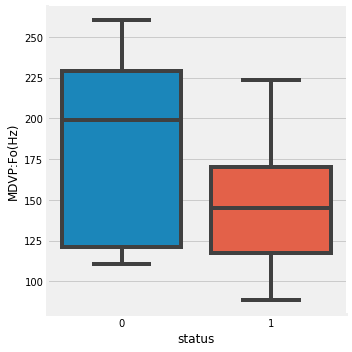

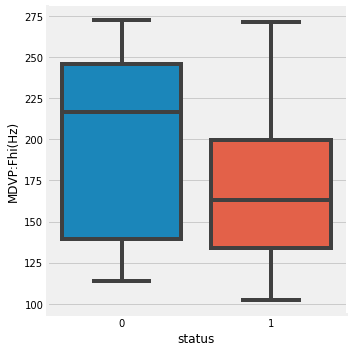

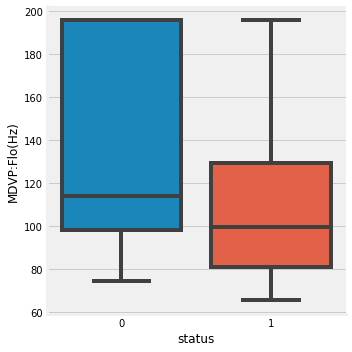

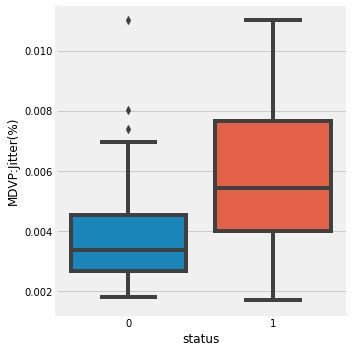

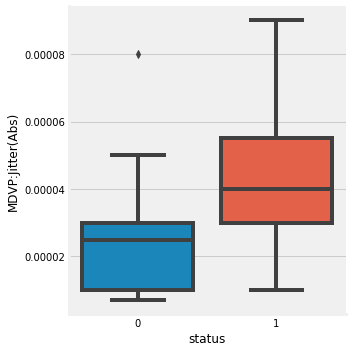

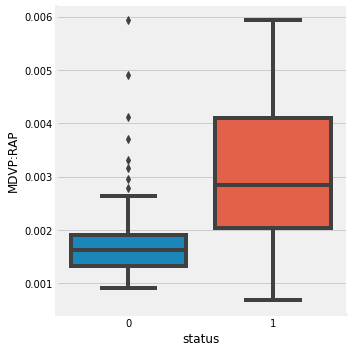

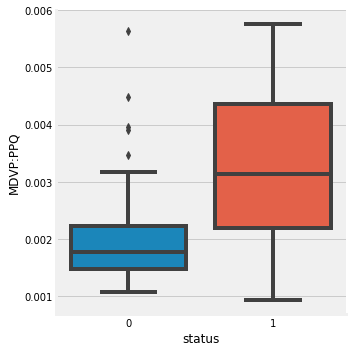

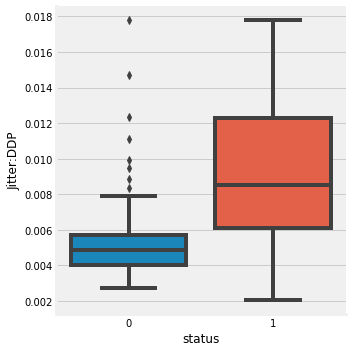

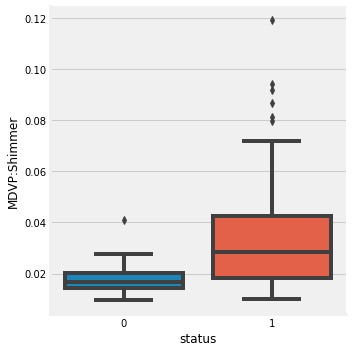

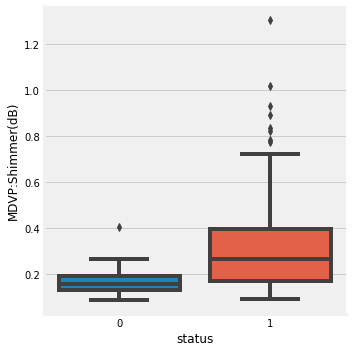

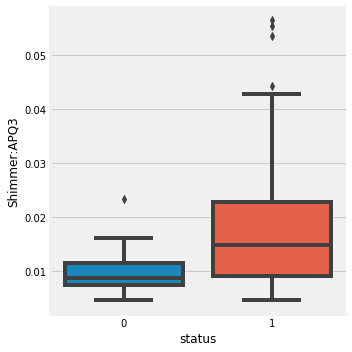

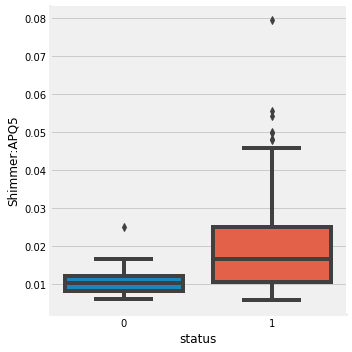

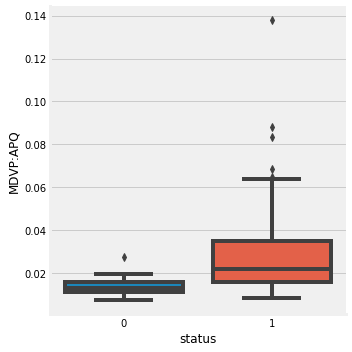

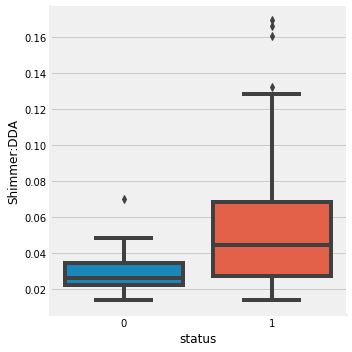

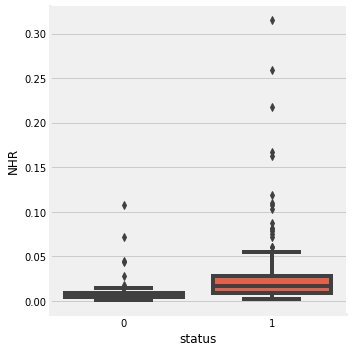

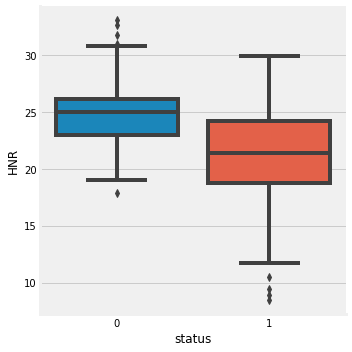

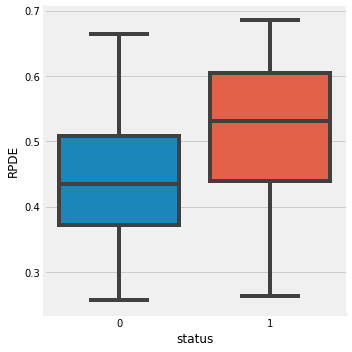

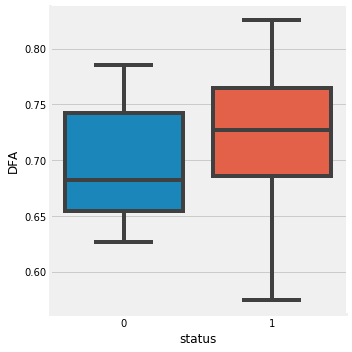

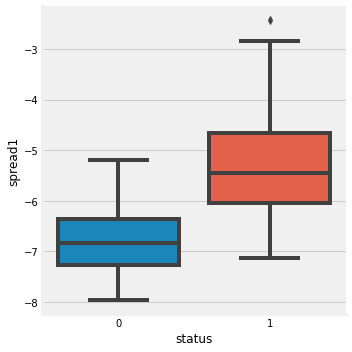

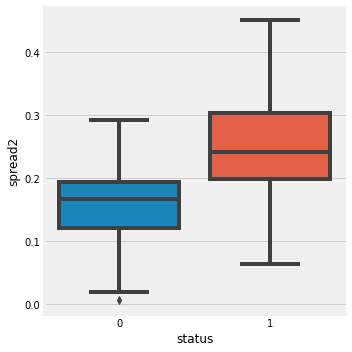

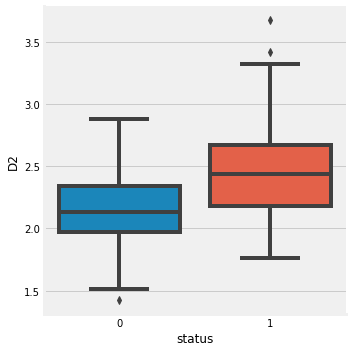

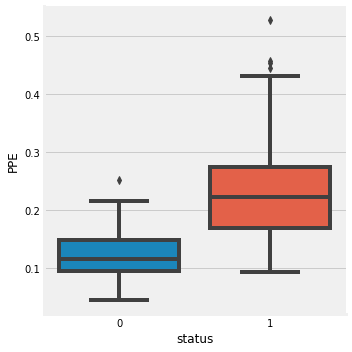

In [78]:
#Bivaraiate Analysis to determine the relationship between independent attribute and target column
for i in pdata:
    if i != 'status' and i != 'name':
        sns.catplot(x="status",y=i,kind ='box',data=pdata);


it is very clear that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then Patient is affected by parkinsons disease.

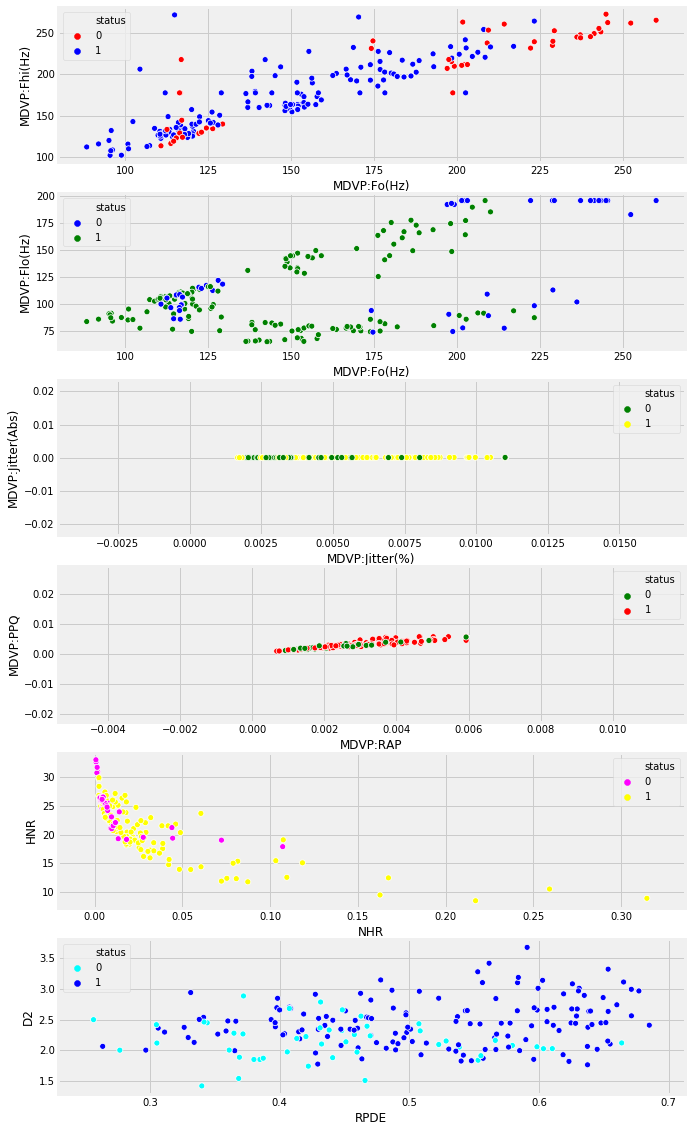

In [90]:
#Bivariate Distribution of Target column (Status) with respect to all other Independent Numeric attributes
#Using Scatter Plot
plt.figure(figsize=(10,20))

plt.subplot(6,1,1)
sns.scatterplot(pdata['MDVP:Fo(Hz)'],pdata['MDVP:Fhi(Hz)'], hue = pdata['status'], palette= ['red','blue']);

plt.subplot(6,1,2)
sns.scatterplot(pdata['MDVP:Fo(Hz)'],pdata['MDVP:Flo(Hz)'] , hue = pdata['status'], palette= ['blue','green']);

plt.subplot(6,1,3)
sns.scatterplot(pdata['MDVP:Jitter(%)'], pdata['MDVP:Jitter(Abs)'], hue =pdata['status'], palette= ['green','yellow']);

plt.subplot(6,1,4)
sns.scatterplot(pdata['MDVP:RAP'],pdata['MDVP:PPQ'], hue = pdata['status'], palette= ['green','red']);

plt.subplot(6,1,5)
sns.scatterplot(pdata['NHR'],pdata['HNR'], hue = pdata['status'], palette= ['magenta','yellow']);

plt.subplot(6,1,6)
sns.scatterplot(pdata['RPDE'],pdata['D2'], hue = pdata['status'], palette= ['cyan','blue']);




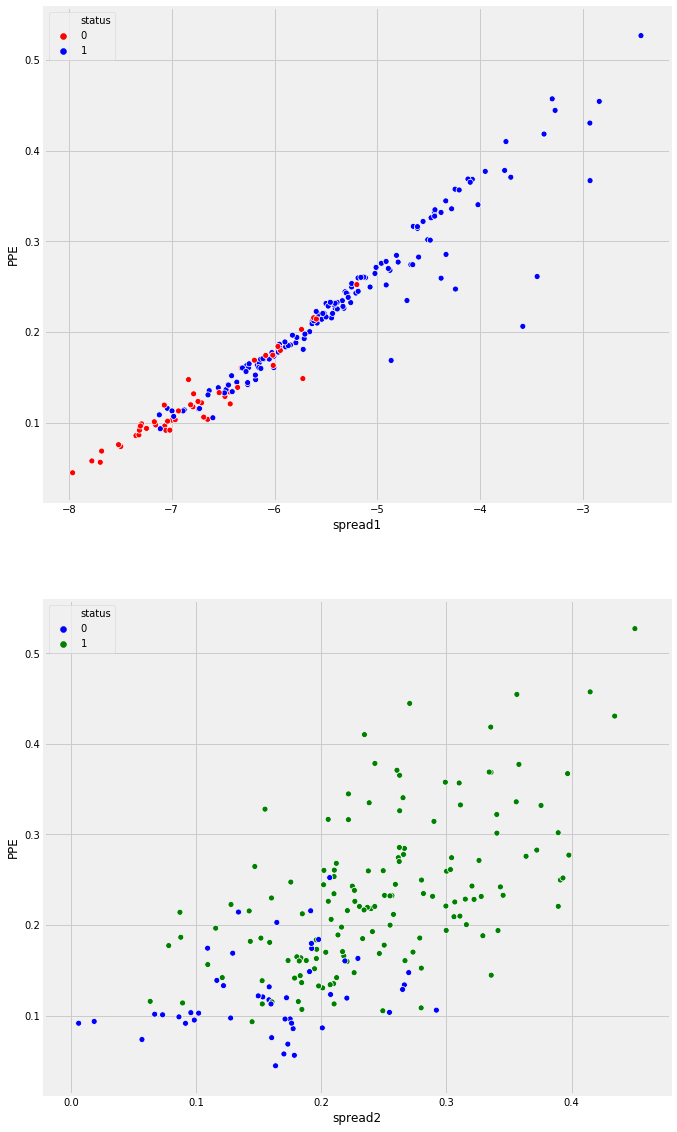

In [98]:
plt.figure(figsize=(10,20))

plt.subplot(2,1,1)
sns.scatterplot(pdata['spread1'],pdata['PPE'], hue = pdata['status'], palette= ['red','blue']);

plt.subplot(2,1,2)
sns.scatterplot(pdata['spread2'],pdata['PPE'] , hue = pdata['status'], palette= ['blue','green']);
    

While seeing the relationship between the nonlinear measures of fundamental frequency attributes,

PPE -Spread1 and PPE -Spread2: it shows that the Patients highly affected by Parkinsons Disease.

PPE is the most important attribute to predict the target class (Status) 

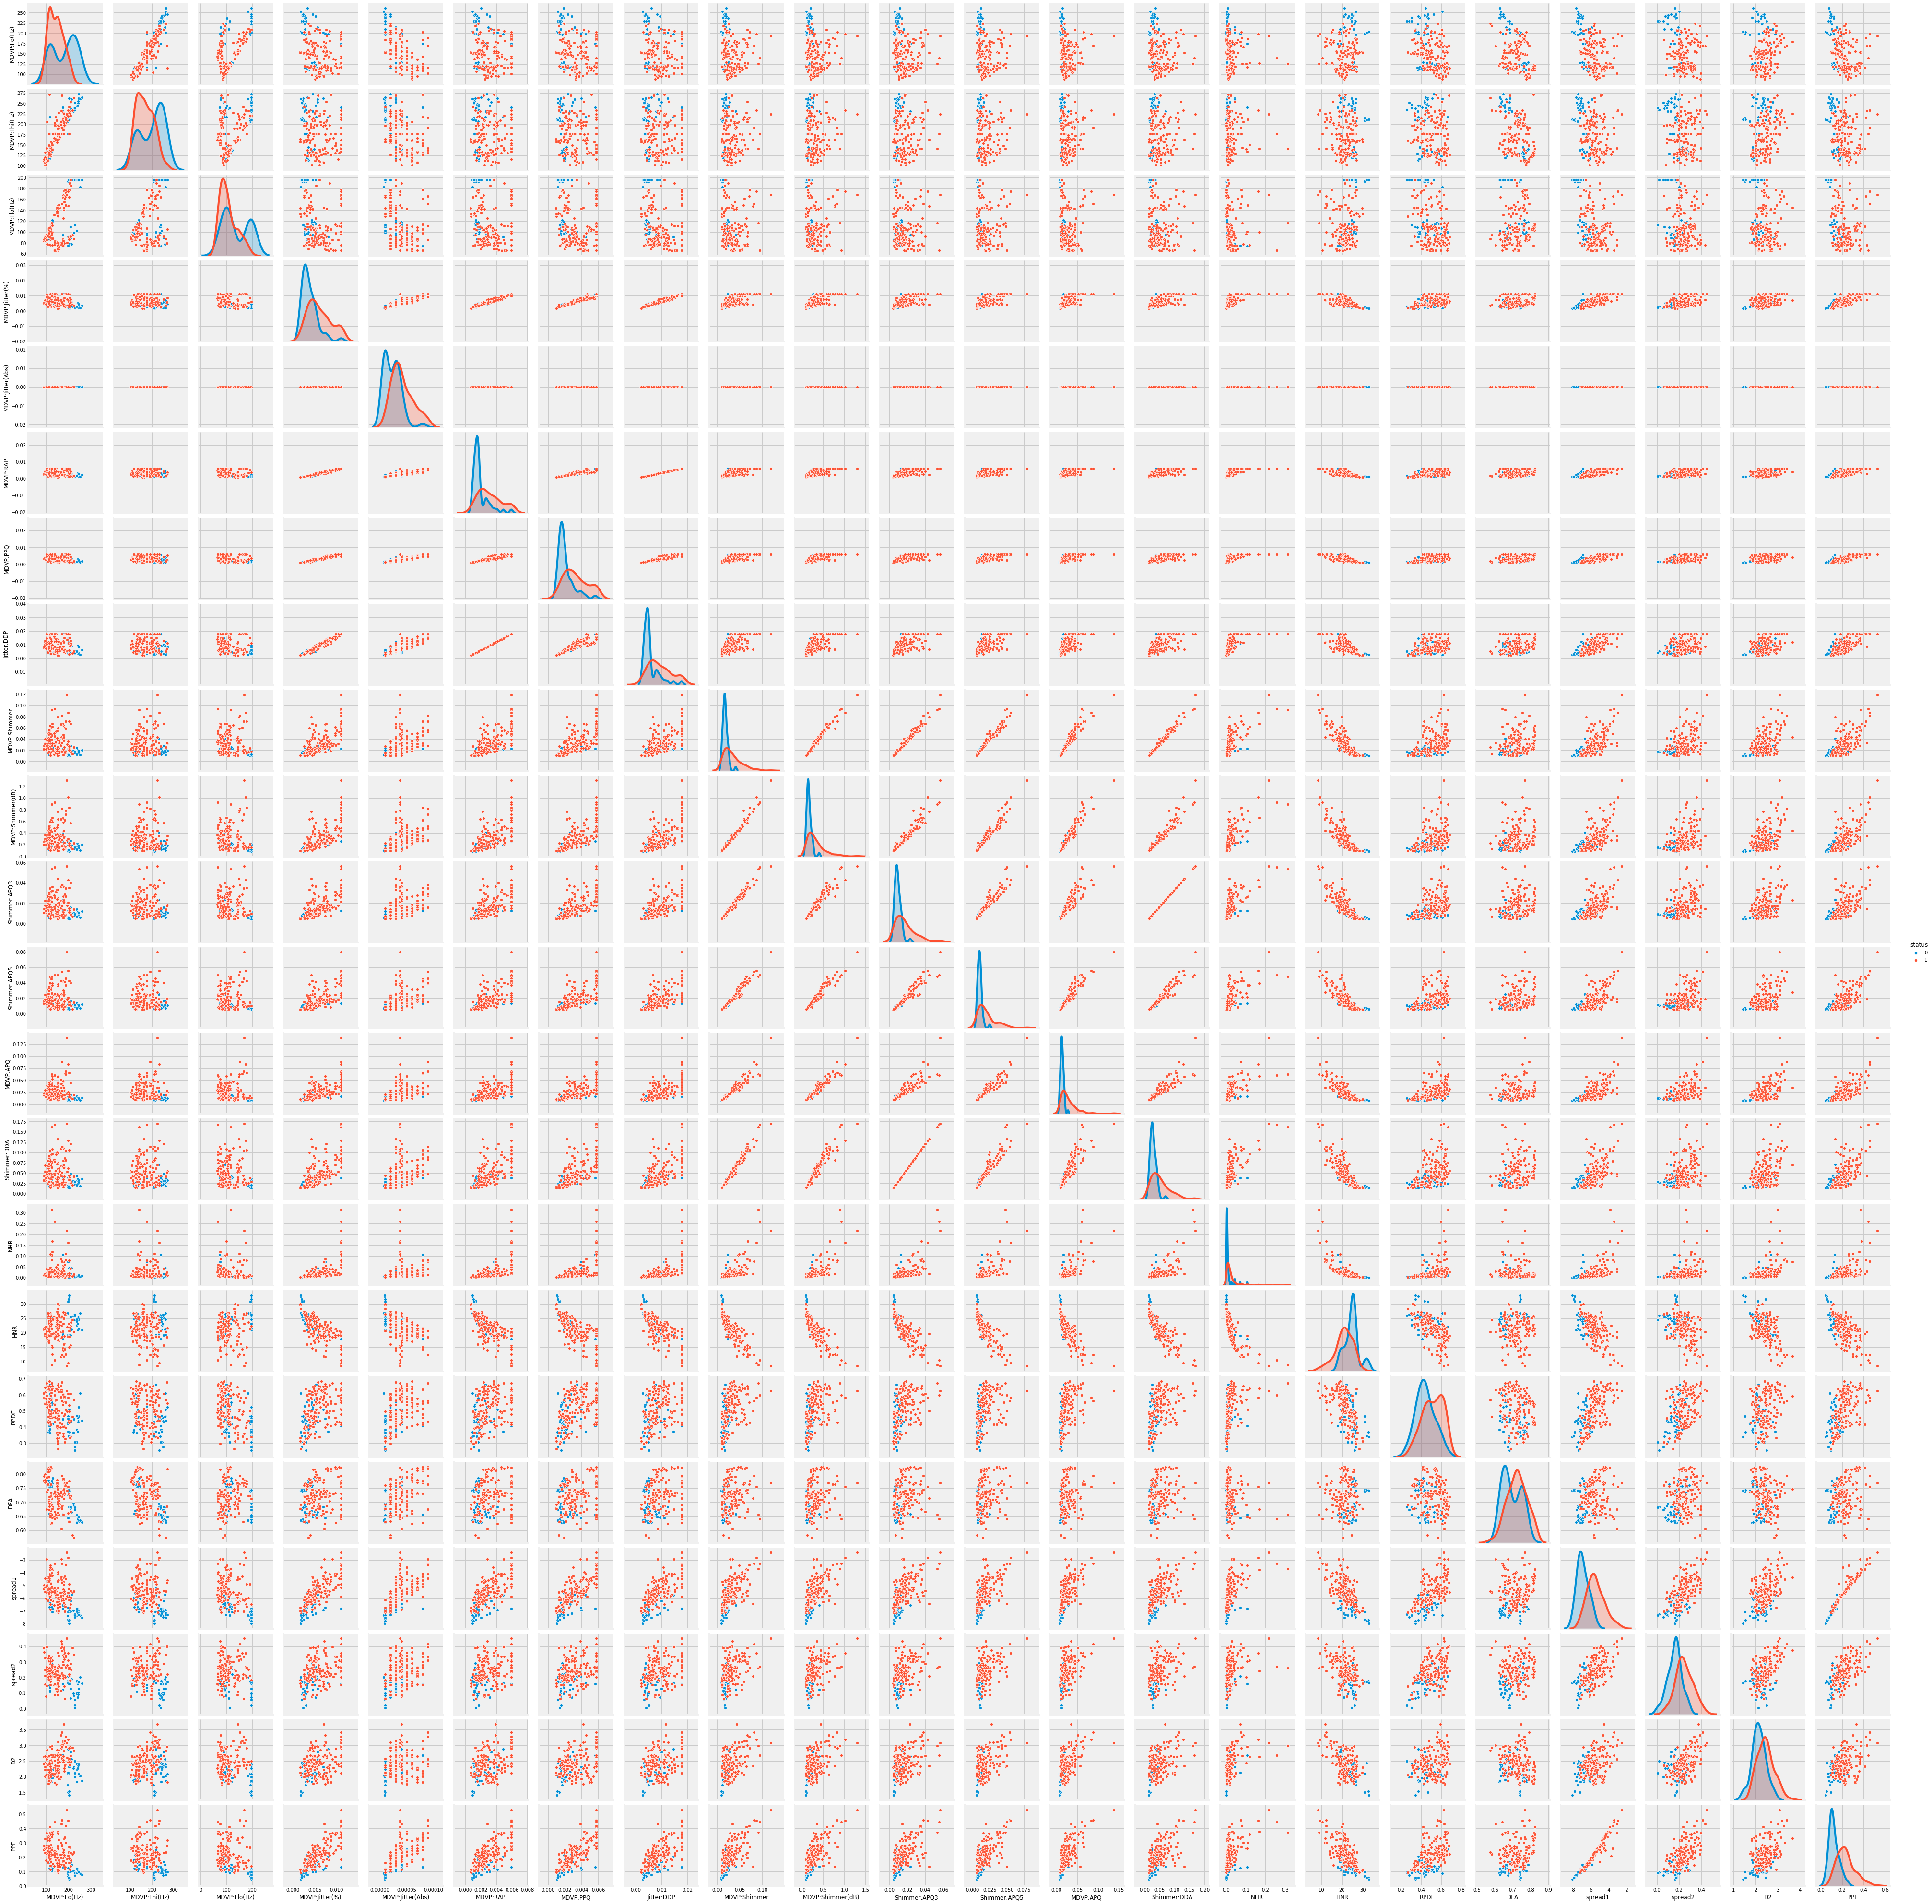

In [407]:
#Pair plot which shows the bivaraiate distribution using scatter plot and univaraite distribution using Histograms.
sns.pairplot(pdata, hue = "status",diag_kind="kde");

# Correlation Matrix

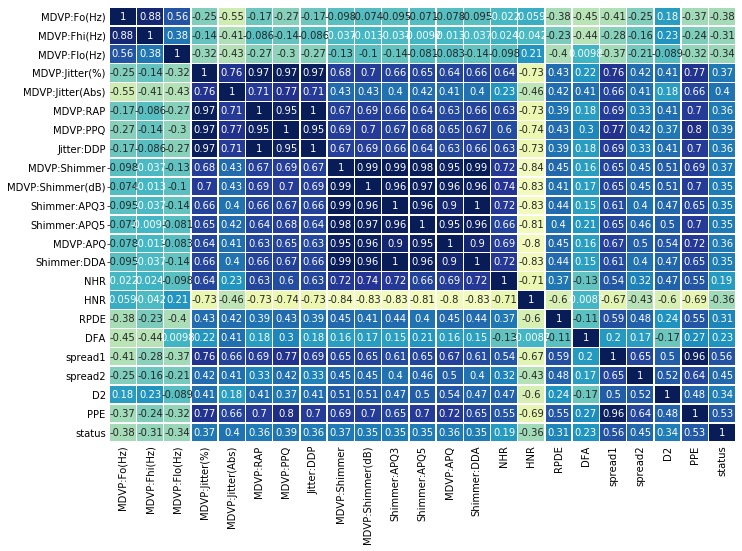

In [103]:
#Use correlation method to observe the relationship between different attributes.
#Apply HeatMap to check the relationship between different attributes.
plt.figure(figsize=(10,8))
sns.heatmap(pdata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu");
plt.show()

# After outlier Treatment

In [104]:
pdata.kurtosis(numeric_only  = True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)        -1.046282
MDVP:Flo(Hz)        -0.338062
MDVP:Jitter(%)      -0.457994
MDVP:Jitter(Abs)     0.008361
MDVP:RAP            -0.506298
MDVP:PPQ            -0.694163
Jitter:DDP          -0.508295
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
status              -0.595518
dtype: float64

In [108]:
pdata.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        0.298456
MDVP:Flo(Hz)        0.910501
MDVP:Jitter(%)      0.713532
MDVP:Jitter(Abs)    0.730093
MDVP:RAP            0.737077
MDVP:PPQ            0.640614
Jitter:DDP          0.736060
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
status             -1.187727
dtype: float64

# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [120]:
from sklearn.model_selection import train_test_split


# Setting Independent features
X = pdata.drop(['status','name'], axis = 1)
#Set Target class label
y = pdata['status']

# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
X_train.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
38       180.198       201.249       175.456         0.00284   
31       199.228       209.512       192.091         0.00241   
173      113.715       116.443        96.913         0.00349   
12       136.926       159.866       131.276         0.00293   
109      193.030       208.900        80.297         0.00766   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
38            0.00002   0.00153   0.00166     0.00459       0.01444   
31            0.00001   0.00134   0.00138     0.00402       0.01015   
173           0.00003   0.00171   0.00203     0.00514       0.01472   
12            0.00002   0.00118   0.00153     0.00355       0.01259   
109           0.00004   0.00450   0.00389     0.01351       0.03044   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
38              0.131       0.00726       0.00885   0.01190      0.02177   
31              0.089       0.00504       0.00641   0.00762      0.01513   
173             0.133       0.00748       0.00905   0.01148      0.02245   
12              0.112       0.00656       0.00717   0.01140      0.01968   
109             0.275       0.01771       0.01815   0.02084      0.05312   

         NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
38   0.00231  26.738  0.403884  0.766209 -6.452058  0.212294  2.269398   
31   0.00167  30.940  0.432439  0.742055 -7.682587  0.173319  2.103106   
173  0.00478  26.547  0.380253  0.766700 -5.943501  0.192150  1.852542   
12   0.00581  25.703  0.460600  0.646846 -6.547148  0.152813  2.041277   
109  0.00947  21.934  0.497554  0.740539 -5.845099  0.278679  2.608749   

          PPE  
38   0.141929  
31   0.068501  
173  0.179677  
12   0.138512  
109  0.185668

In [121]:
#Display Target column's train data
pd.crosstab(y_train,columns='count',colnames=['Train data'])

Train data  count
status           
0              33
1             103

In [122]:
# Shape and size of Training dataset
print("Training data size\n",X_train.shape,y_train.shape)

Training data size
 (136, 22) (136,)


In [123]:
#Display the Independent features test dataset
X_test.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
138      112.239    126.609000       104.095         0.00472   
16       144.188    177.414634        82.764         0.00544   
155      117.870    127.349000        95.654         0.00647   
96       159.116    168.913000       144.811         0.00342   
68       143.533    162.215000        65.809         0.01101   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
138           0.00004   0.00238   0.00290     0.00715       0.05643   
16            0.00004   0.00211   0.00292     0.00632       0.02047   
155           0.00005   0.00356   0.00300     0.01067       0.03087   
96            0.00002   0.00178   0.00184     0.00535       0.03381   
68            0.00008   0.00593   0.00467     0.01778       0.05384   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
138             0.517       0.03070       0.03530   0.04451      0.09211   
16              0.192       0.00969       0.01200   0.02074      0.02908   
155             0.276       0.01659       0.01804   0.02402      0.04977   
96              0.307       0.01806       0.02024   0.02809      0.05417   
68              0.478       0.03152       0.02422   0.03392      0.09455   

         NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
138  0.02629  17.366  0.640945  0.701404 -5.634576  0.306014  2.419253   
16   0.01859  22.333  0.567380  0.644692 -5.440040  0.239764  2.264501   
155  0.02631  22.431  0.628300  0.652025 -3.583722  0.207914  2.439597   
96   0.00852  22.663  0.366329  0.693429 -6.417440  0.194627  2.473239   
68   0.04882  20.338  0.513237  0.731444 -5.869750  0.151814  2.118496   

          PPE  
138  0.209191  
16   0.218164  
155  0.206256  
96   0.151709  
68   0.185580

In [124]:
#Display Target column's Test data
pd.crosstab(y_test,columns='count',colnames=['Test data'])

Test data  count
status          
0             15
1             44

In [126]:
#Print Test data size

print("\nTesting data size\n",X_test.shape,y_test.shape)


Testing data size
 (59, 22) (59,)


In [127]:
#check split of dataset
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [128]:
#Detailed Summary count of Original, Train and Test DataSet
print(" Parkinsons Disease Affected Person count: {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['status'] == 1]), (len(pdata.loc[pdata['status'] == 1])/len(pdata.index)) * 100))
print("Parkinsons Disease not affected Person Count : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['status'] == 0]), (len(pdata.loc[pdata['status'] == 0])/len(pdata.index)) * 100))
print("")
print("Training data- Parkinsons Disease affected Person count   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training data -Parkinsons Disease not affected Person count   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Testing data- Parkinsons Disease affected Person count: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Testing data- Parkinsons Disease not affected Person count : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

 Parkinsons Disease Affected Person count: 147 (75.38%)
Parkinsons Disease not affected Person Count : 48 (24.62%)

Training data- Parkinsons Disease affected Person count   : 103 (75.74%)
Training data -Parkinsons Disease not affected Person count   : 33 (24.26%)

Testing data- Parkinsons Disease affected Person count: 44 (74.58%)
Testing data- Parkinsons Disease not affected Person count : 15 (25.42%)



# 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any)

In [180]:
# Applying RobustScaler method to make it less prone to outliers
from sklearn.preprocessing import RobustScaler  
features = X.columns
#RobustScaler() scales features using IQR that are robust to outliers
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = features)

# Scaling the independent variables
Xscale = X.apply(zscore)

display(X.shape, Xscale.shape, y.shape)

(195, 22)

(195, 22)

(195,)

In [408]:
#Apply Standard scaler method to Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

# Logisitic Regression

Training Score:  0.882
Test Score:  0.881
Classification Report of LR :
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.89      0.95      0.92        44

    accuracy                           0.88        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.88      0.88      0.88        59

Accuracy:  0.881


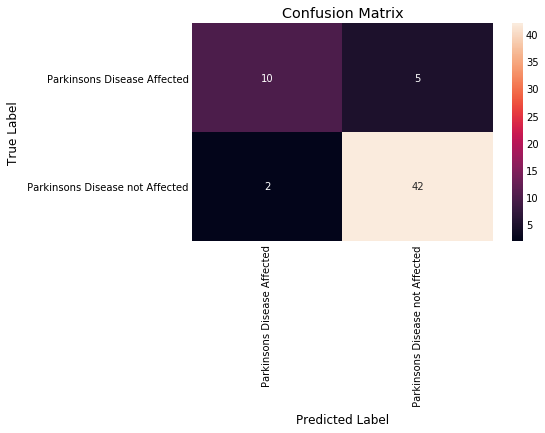

Method  accuracy
0  Logistic Regression  0.881356

In [387]:
#Create Logistic Regression Model

LR = LogisticRegression(solver="liblinear")
LR.fit(X_train, y_train)
#predict target class on test data
y_pred = LR.predict(X_test)

accuracy_LR = accuracy_score(y_test, y_pred)

print('Training Score: ', LR.score(X_train, y_train).round(3))
print('Test Score: ', LR.score(X_test, y_test).round(3))
print('Classification Report of LR :')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_LR.round(3))
#Print Confusion Matrix
cm_LR = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_LR = pd.DataFrame(cm_LR, index = label, columns = label)
sns.heatmap(cm1_LR, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Store the accuracy results for each model in a dataframe for final comparison
resultDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': [accuracy_LR] })
resultDf = resultDf[['Method', 'accuracy']]
resultDf

# Naive Bayes Model

Training Score:  0.684
Test Score:  0.797
Classification Report of Gaussian Naive Bayes model :
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.90      0.82      0.86        44

    accuracy                           0.80        59
   macro avg       0.74      0.78      0.75        59
weighted avg       0.82      0.80      0.80        59

Accuracy:  0.797


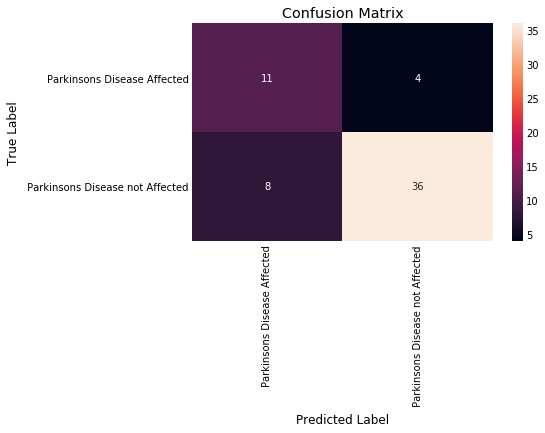

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610

In [388]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
#predict target class on test data
y_pred = NB.predict(X_test)

accuracy_NB = accuracy_score(y_test, y_pred)

print('Training Score: ', NB.score(X_train, y_train).round(3))
print('Test Score: ', NB.score(X_test, y_test).round(3))
print('Classification Report of Gaussian Naive Bayes model :')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_NB.round(3))
#Print Confusion Matrix
cm_NB = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_NB = pd.DataFrame(cm_NB, index = label, columns = label)
sns.heatmap(cm1_NB, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tempResultDf = pd.DataFrame({'Method':['Naive Bayes'], 'accuracy': [accuracy_NB]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf

# Support Vector Machine

Training Score:  0.897
Test Score:  0.898
Classification Report of SVM model :
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

Accuracy:  0.898


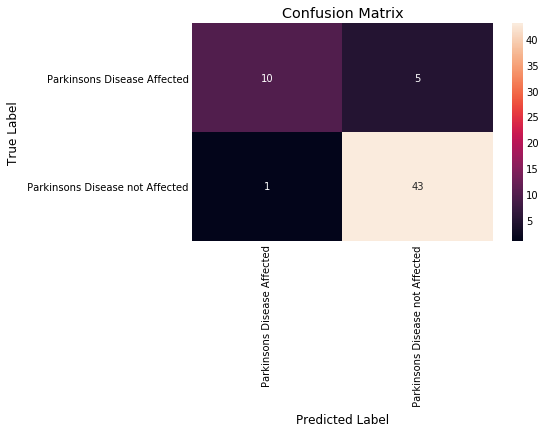

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610
0                  SVM  0.898305

In [389]:
#Build SVM Model
from sklearn.svm import SVC 
SVM = SVC(gamma=0.025, C=3)  
  
SVM.fit(X_train , y_train)
#predict target class on test data
y_pred = SVM.predict(X_test)

accuracy_SVM = accuracy_score(y_test, y_pred)

print('Training Score: ', SVM.score(X_train, y_train).round(3))
print('Test Score: ', SVM.score(X_test, y_test).round(3))
print('Classification Report of SVM model :')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_SVM.round(3))

cm_SVM = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_SVM = pd.DataFrame(cm_SVM, index = label, columns = label)
sns.heatmap(cm1_SVM, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tempResultDf = pd.DataFrame({'Method':['SVM'], 'accuracy': [accuracy_SVM]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf

# k-Nearest Neighbor Classifier

Training Score:  0.963
Test Score:  0.932
Classification Report of KNN Classifier Model :
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

Accuracy:  0.932


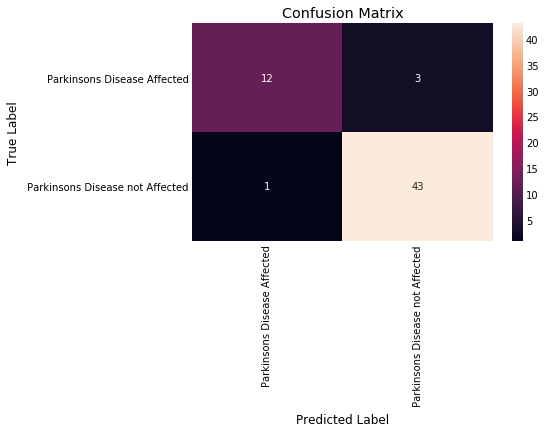

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610
0                  SVM  0.898305
0                  KNN  0.932203

In [390]:
from sklearn.neighbors import KNeighborsClassifier
#Build KNN model
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)   
#predict target class on test data
y_pred = KNN.predict(X_test)

accuracy_KNN = accuracy_score(y_test, y_pred)

print('Training Score: ', KNN.score(X_train, y_train).round(3))
print('Test Score: ', KNN.score(X_test, y_test).round(3))
print('Classification Report of KNN Classifier Model :')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_KNN.round(3))

cm_KNN = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_KNN = pd.DataFrame(cm_KNN, index = label, columns = label)
sns.heatmap(cm1_KNN, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tempResultDf = pd.DataFrame({'Method':['KNN'], 'accuracy': [accuracy_KNN]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf

# 7. Train a meta-classifier and note the accuracy on test data

# Decision Tree Classifier

Training Score:  0.89
Test Score:  0.847
Classification Report of Decision Tree classifier :
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.91      0.89      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.81      0.80        59
weighted avg       0.85      0.85      0.85        59

Accuracy:  0.847


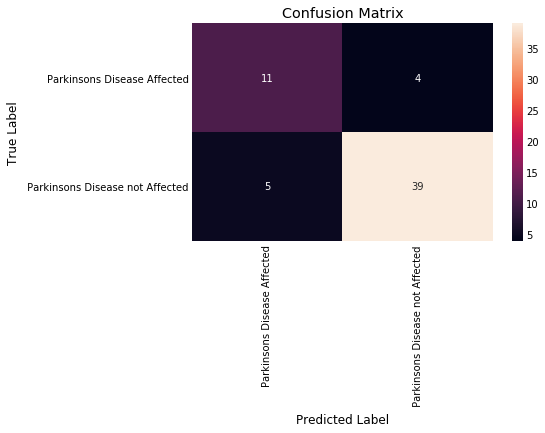

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610
0                  SVM  0.898305
0                  KNN  0.932203
0        Decision Tree  0.847458

In [391]:
#Build Decision Tree Classifier
#Prune the decision tree by limiting the max. depth of trees to avoid over-fitting
DT = DecisionTreeClassifier(criterion = "gini", random_state = random_state,max_depth=3, min_samples_leaf=5)
DT.fit(X_train, y_train)
#predict target class on test data
y_pred = DT.predict(X_test)
feature_cols = X.columns

accuracy_DT = accuracy_score(y_test, y_pred)

print('Training Score: ', DT.score(X_train, y_train).round(3))
print('Test Score: ', DT.score(X_test, y_test).round(3))
print('Classification Report of Decision Tree classifier :')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_DT.round(3))

cm_DT = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_DT = pd.DataFrame(cm_DT, index = label, columns = label)
sns.heatmap(cm1_DT, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


tempResultDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [accuracy_DT]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf


Feature Importance for Decision Tree  ----------------------------------------------------------------------------


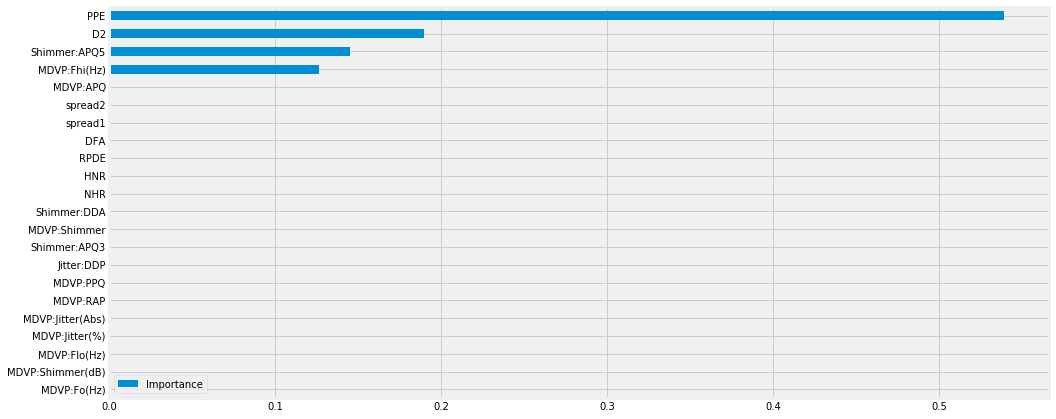

In [392]:
print('Feature Importance for Decision Tree ', '--'*38)
feature_importances = pd.DataFrame(DT.feature_importances_, index = X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2))

Single Decision Tree employed to find the accuracy score but it depends mostly on PPE attribute to predict the target class.
It doesn't use the other attributes .
Disadvanatage : Low Feature selection

# Meta-Classifier

Training Score:  0.912
Test Score:  0.898
Classification Report of Meta Classifier model :
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59

Accuracy:  0.898


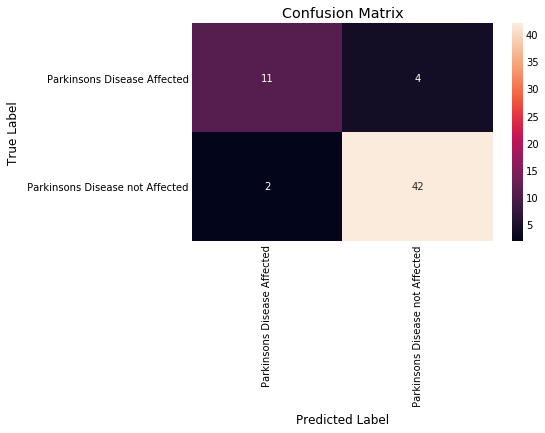

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610
0                  SVM  0.898305
0                  KNN  0.932203
0        Decision Tree  0.847458
0      Meta Classifier  0.898305

In [393]:
#Stacking is designed to improve modeling performance
#Train a meta-classifier
level0 = list()
level0.append(('LR', LR))
level0.append(('KNN', KNN ))
level0.append(('CART', DT ))
level0.append(('SVM', SVM ))
level0.append(('Naive Bayes', NB ))
# define meta learner model
#Classification Meta-Model: Use Logistic Regression.
level1 = LR
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model 
model.fit(X, y)
#predict Target class on test data in Meta Classifier Model
y_pred = model.predict(X_test)

accuracy_meta = accuracy_score(y_test, y_pred)

print('Training Score: ', model.score(X_train, y_train).round(3))
print('Test Score: ', model.score(X_test, y_test).round(3))
print('Classification Report of Meta Classifier model :')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_meta.round(3))
cm_meta = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_meta = pd.DataFrame(cm_meta, index = label, columns = label)
sns.heatmap(cm1_meta, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
tempResultDf = pd.DataFrame({'Method':['Meta Classifier'], 'accuracy': [accuracy_meta]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf

# 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

# Random Forest Model

Training Score:  1.0
Test Score:  0.932
Classification Report of Random Forest model :
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

Accuracy:  0.932


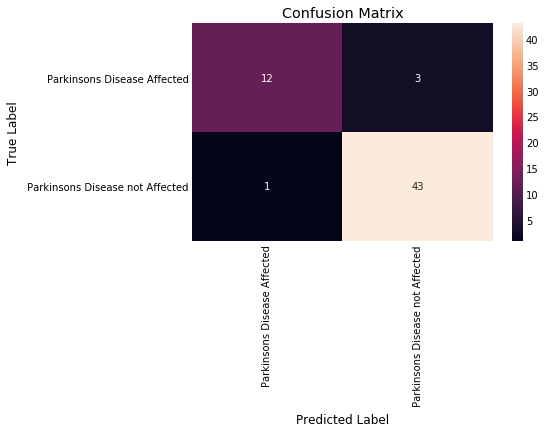

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610
0                  SVM  0.898305
0                  KNN  0.932203
0        Decision Tree  0.847458
0      Meta Classifier  0.898305
0        Random Forest  0.932203

In [394]:
#Apply the Random forest model and print the accuracy of Random forest Model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100 ,random_state = random_state)
RF.fit(X_train, y_train)
#predict target class on test data
y_pred = RF.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred)

print('Training Score: ', RF.score(X_train, y_train).round(3))
print('Test Score: ', RF.score(X_test, y_test).round(3))
print('Classification Report of Random Forest model :')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_RF.round(3))

cm_RF = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_RF = pd.DataFrame(cm_RF, index = label, columns = label)
sns.heatmap(cm1_RF, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tempResultDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [accuracy_RF]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf

Feature Importance for Random Forest Classifier  ----------------------------------------------------------------------------


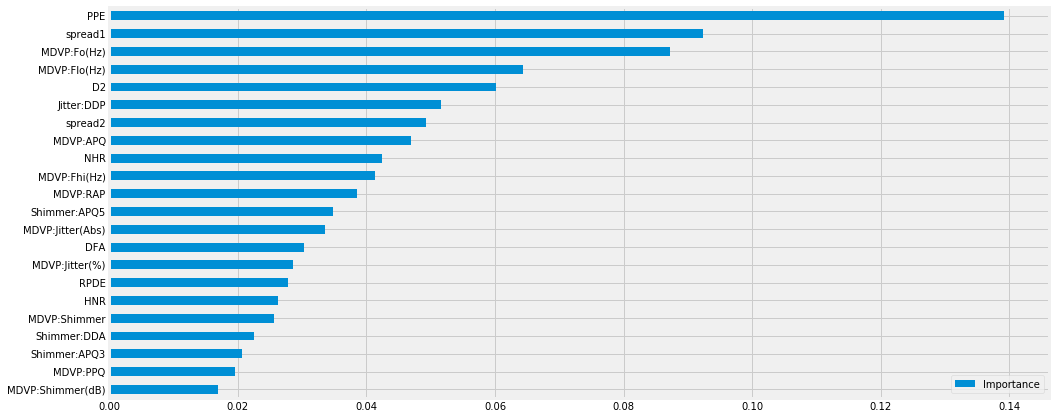

In [395]:
print('Feature Importance for Random Forest Classifier ', '--'*38)
feature_importances = pd.DataFrame(RF.feature_importances_, index = X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2))

Random forest which is Ensemble of Decision Trees employed to find the best accuracy score but it depends mostly on PPE attribute to predict the target class.

This uses all the independent attributes to predict the target class but PPE has the highest feature importance. 

Advanatage : High Feature selection

# Bagging Model

Training Score:  0.993
Test Score:  0.915
Classification Report of Bagging Model:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59

Accuracy:  0.915


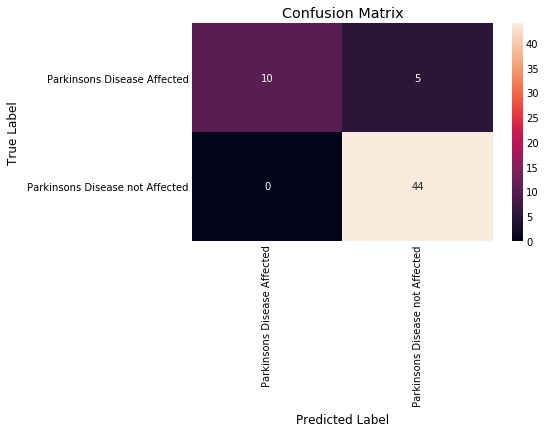

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610
0                  SVM  0.898305
0                  KNN  0.932203
0        Decision Tree  0.847458
0      Meta Classifier  0.898305
0        Random Forest  0.932203
0              Bagging  0.915254

In [396]:
from sklearn.ensemble import BaggingClassifier

BAG = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
BAG.fit(X_train, y_train)
#predict target class on test data
y_pred = BAG.predict(X_test)

accuracy_BAG = accuracy_score(y_test, y_pred)

print('Training Score: ', BAG.score(X_train, y_train).round(3))
print('Test Score: ', BAG.score(X_test, y_test).round(3))
print('Classification Report of Bagging Model:')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_BAG.round(3))

cm_BAG = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_BAG = pd.DataFrame(cm_BAG, index = label, columns = label)
sns.heatmap(cm1_BAG, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tempResultDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [accuracy_BAG]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf

# Boosting Model

# AdaBoost Classifier

Training Score:  0.971
Test Score:  0.881
Classification Report of ADABOOST Ensemble Model:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59

Accuracy:  0.881


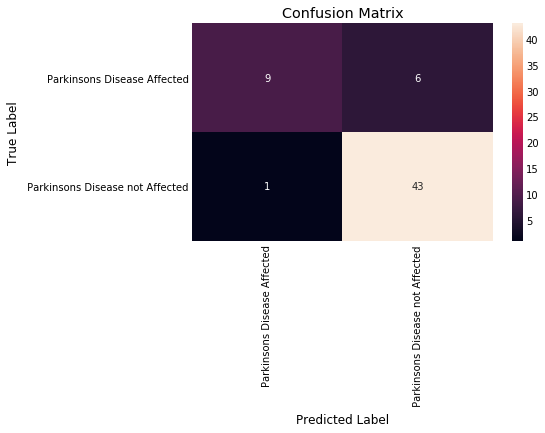

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610
0                  SVM  0.898305
0                  KNN  0.932203
0        Decision Tree  0.847458
0      Meta Classifier  0.898305
0        Random Forest  0.932203
0              Bagging  0.915254
0             ADABOOST  0.881356

In [397]:
# Apply Adaboost Ensemble Algorithm and print the accuracy.
from sklearn.ensemble import AdaBoostClassifier
ADABOOST = AdaBoostClassifier(n_estimators= 50, learning_rate=0.1, random_state=random_state)
ADABOOST.fit(X_train, y_train)
#predict target class on test data
y_pred = ADABOOST.predict(X_test)

accuracy_ADABOOST = accuracy_score(y_test, y_pred)

print('Training Score: ', ADABOOST.score(X_train, y_train).round(3))
print('Test Score: ', ADABOOST.score(X_test, y_test).round(3))
print('Classification Report of ADABOOST Ensemble Model:')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_ADABOOST.round(3))

cm_ADABOOST = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_ADABOOST = pd.DataFrame(cm_ADABOOST, index = label, columns = label)
sns.heatmap(cm1_ADABOOST, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tempResultDf = pd.DataFrame({'Method':['ADABOOST'], 'accuracy': [accuracy_ADABOOST]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf


# GradientBoost Classifier

Training Score:  1.0
Test Score:  0.915
Classification Report of Gradient Boosting Classifier Model :
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59

Accuracy:  0.915


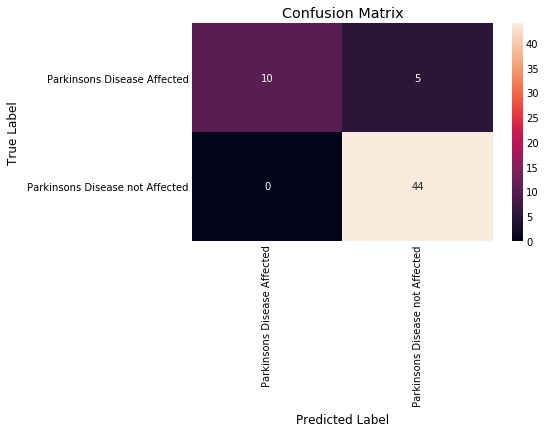

Method  accuracy
0  Logistic Regression  0.881356
0          Naive Bayes  0.796610
0                  SVM  0.898305
0                  KNN  0.932203
0        Decision Tree  0.847458
0      Meta Classifier  0.898305
0        Random Forest  0.932203
0              Bagging  0.915254
0             ADABOOST  0.881356
0    Gradient Boosting  0.915254

In [398]:
#Apply GradientBoost Classifier Algorithm and print the accuracy
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators = 20, random_state=random_state)
GB.fit(X_train, y_train)
#predict target class on test data
y_pred =GB.predict(X_test)

accuracy_GB = accuracy_score(y_test, y_pred)

print('Training Score: ', GB.score(X_train, y_train).round(3))
print('Test Score: ', GB.score(X_test, y_test).round(3))
print('Classification Report of Gradient Boosting Classifier Model :')
print(classification_report(y_test,y_pred))

print('Accuracy: ', accuracy_GB.round(3))

cm_GB = metrics.confusion_matrix(y_test, y_pred)

label = ["Parkinsons Disease Affected", " Parkinsons Disease not Affected"]
cm1_GB = pd.DataFrame(cm_GB, index = label, columns = label)
sns.heatmap(cm1_GB, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

tempResultDf = pd.DataFrame({'Method':['Gradient Boosting'], 'accuracy': [accuracy_GB]})
resultDf = pd.concat([resultDf, tempResultDf])
resultDf = resultDf[['Method', 'accuracy']]
resultDf


# 9. Compare all the models (minimum 5) and pick the best one among them

Logisitic Regression: 0.846154 
Naive Bayes: 0.738462 
SVM: 0.815385 
Decision Tree: 0.769231 
Meta-Classifier: 0.815385 
Random Forest: 0.861538 
Bagging: 0.769231 
AdaBoost: 0.753846 
GradientBoost: 0.815385 


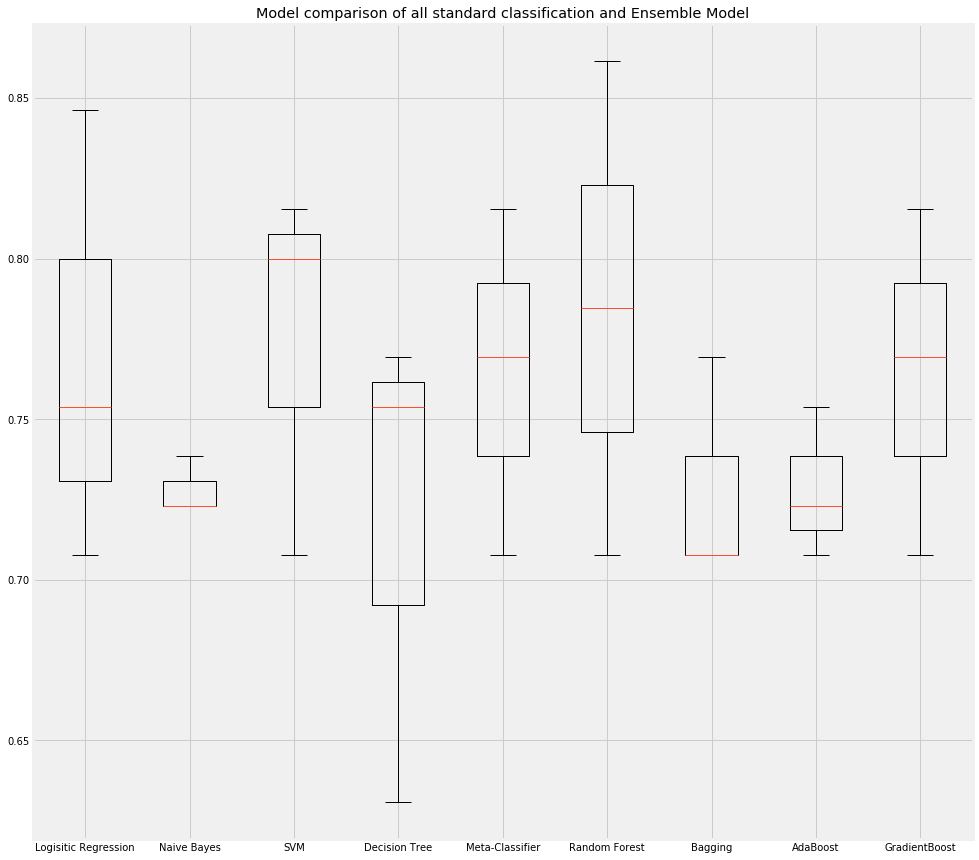

In [404]:
best_model = []
best_model.append(('Logisitic Regression', LR ))
best_model.append(('Naive Bayes', NB ))
best_model.append(('SVM', SVM ))
best_model.append(('Decision Tree', DT ))
best_model.append(('Meta-Classifier',model ))
best_model.append(('Random Forest', RF ))
best_model.append(('Bagging', BAG))
best_model.append(('AdaBoost', ADABOOST ))
best_model.append(('GradientBoost', GB ))


# Evaluate each model 
output = []
identifier = []
Best_scoring = 'accuracy'
for name, model in best_model:
# Perform k-fold Cross-Validation to evaluate the Performance metrics of all Classification Models
    from sklearn import model_selection
    kfold = model_selection.KFold(n_splits=3)
    cv_output = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=Best_scoring)
    output.append(cv_output)
    identifier.append(name)
    result = "%s: %f " % (name, cv_output.max())
    print(result)
    
# Using Box plot to find the Best Model 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
plt.title("Model comparison of all standard classification and Ensemble Model")
plt.boxplot(output);
ax.set_xticklabels(identifier)
plt.show()

# Conclusion:

Ultimate Goal is to classify the patients into the Parkinsons Disease Affected and Non-affected label using the attributes from their voice recordings Dataset.

Machine Learning algorithms like Standard Classification and Ensemble Models applied to predict accurately for diagnosis Parkinsons Disease, this would be an effective screening step prior to an appointment with a clinician.

Hence from the above model comparison,"Random Forest "  model is the Best model score since it provides higher accuracy score through cross validation. Random forest classifier will handle the missing values ,maintain the accuracy of a large proportion of data and are a popular method for feature ranking as it select good features to predict the Target class accurately.